<h1 align = 'center'>CS7317 <br />Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification</h1>

<b>Student name: Arpit Garg <br />
Student ID: A1784072</b>

<b>Initialise environment, libraries, settings, etc.:</b>

In [833]:
#importing all the libraries...
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl

<b>Load the data set:</b>

In [834]:
#load the dataset..
#all the features in X and label in y
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns=["target"])

<br /><br /><b>1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?</b>

<br /><br />

<b>Answer: <br /> </b>
<H3>There are 10 parameters of the cell nuclei mean:</H3><br /><br />
<img src="https://i.ibb.co/9GNt1WS/1.png" alt="Nucleus" border="0"></a><br /><br />

Before explaining all the parameters we need to understand the term snake which is used in estimating all the parameters. <br/>
The boundary of the cell nucleus is located by an active countour model known as <b>snake</b>. A snake is basically a spline which aims to minimize the energy function defined over the arclength of a closed curve. <br/>
After detecting the boundaries of the nucleus.The energy function is computed at different number of discrete points called <b>snake points</b>. <br/> 
The distance from the center to the snake point is the <b>length of radial line</b> <br/>
The figure will look like this
<br />
<br />
<figure>
    <img src="https://i.ibb.co/9VFZHfx/Snakes-after-convergence-to-cell-nucleus-boundaries.png" alt="Snakes-after-convergence-to-cell-nucleus-boundaries" border="0" >
    <figcaption><b><center>Figure 2. Snakes after convergence to cell nucleus boundaries</center></b></figcaption>
</figure>
<br /><br />

<b>1.Radius</b><br />
It is computed by averaging the length of radial line segment that is lines from centre of mass of the snake to each of the snake point (discrete points). We can detect the anomaly behavior from this.<br/>
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean radius of malignant and benign are 6.981, 28.11 respectively with the standard error in the radius are 0.112, 2.873 respectively and worst radius are 7.93, 36.04 respectively. <br />
<b> Insights</b> <br />
Radius can be used as one of the successful parameter in classification as we can observe the values of radius of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have very high mean radius as compared to malignant so it can be used as a parameter of classifictaion. <br />
From the below shown figure mean of all the r is taken to calculate the radius of the nucleus <br/>
<b>c</b>: differet snake points <br/>
<b>r</b>: radial length from center <br/>
<b>Radius</b>: Average of all the r's
<figure>
<img src="https://i.ibb.co/kJYNFgH/j.png" alt="Radius" border="0">
<figcaption><b><center>Figure 3. Radius of nucleus</center></b></figcaption>
</figure>
<br /> <br />

<b>2.Perimeter</b> <br />
It is calculated as the total distance between the snake points on the nucleus parameter. We can detect the anomaly behavior from this. <br />
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean perimeter of malignant and benign are 43.79, 188.5 respectively with the standard error in the perimeter are 0.757, 21.98 respectively and worst perimeter are 50.41,
251.2 respectively. <br />
<b> Insights</b> <br />
Perimeter can be used as one of the successful parameter in classification as we can observe the values of perimeter of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. As from the stats we can observe that there's a significant difference between the values of two so we can use this as a parameter of classification <br />
<b>c</b>: different snake points <br />
<b>P</b>: distance between snake points <br />
<b>Perimeter</b>: Total distances of P <br />
<figure>
<img src="https://i.ibb.co/tXMd3N6/Untitled-Diagram.png" alt="Perimeter" border="0" height =400 width =400>
<figcaption><b><center>Figure 4. Perimeter of nucleus</center></b></figcaption>
</figure>
<br /><br />
<b>3.Area</b> <br />
It is calculated by summing the number of pixels inside the snake with half amount of pixels present on perimeter. We can detect the anomaly behavior from this.<br />
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean area of malignant and benign are 143.5 , 2501.0 respectively with the standard error in the area are 6.802, 542.2 respectively and worst area are 5185.2, 4254.0 respectively. <br />
<b> Insights</b> <br />
Area can be used as one of the successful parameter in classification as we can see the area difference between nucleus of malignant and benign with the acceptable error and worst case and used it for classification. As from the stats we can easily observed that there is  a huge difference between the area of malignant and benign<br />
<b>Area</b>: Sum of all the pixels in the snake with adding half amount of pixels in perimeter<br />
<figure>
<img src="https://i.ibb.co/NF8jxvC/1.png" alt="Area" border="0">
<figcaption><b><center>Figure 5. Area of nucleus</center></b></figcaption>
</figure>
<br /><br />
<b>4.Compactness</b> <br />
It is calculated by using the formula perimeter^2/area and it will increases as incraese the irregularity. We can detect the anomaly behavior from this. <br />
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean compactness of malignant and benign are 0.019, 0.345 respectively with the standard error in the compactness are 0.002,0.135 respectively and worst compactness are 0.027, 1.058respectively. <br />
<b> Insights</b> <br />
Compactness can be used as one of the successful parameter in classification as we can observe the values of compactness of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. As from the stats we can observe that there's a significant difference between the values of two so we can use this as a parameter of classification <br />
<b>Compactness</b>: Perimeter^2/Area <br />
<figure>
<img src="https://i.ibb.co/JR95dxz/2.png" alt="Compactness" border="0"></a>
<figcaption><b><center>Figure 6. Different Compactness of nucleus</center></b></figcaption>
</figure>
<br /><br />
<b>5.Smoothness</b> <br />
The Smoothness is calculated by measuring the difference between the length of radial line and the mean length of lines surrounding it. We can detect the anomaly behavior from this.<br />
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean smoothness of malignant and benign are 0.053, 0.163 respectively with the standard error in the smoothness are 0.002, 0.031 respectively and worst smoothness are 0.071,0.223 respectively. <br />
<b> Insights</b> <br />
Smoothness can be used as one of the successful parameter in classification as we can observe the values of smoothness of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. As from the stats we can observe that there's a significant difference between the values of two so we can use this as a parameter of classification <br />
<b>r:</b>Radius <br />
<b>c:</b>Snake point distances <br />

<figure>
<img src="https://i.ibb.co/rpLfvjD/formula.png" alt="formula" border="0"><br />
<figcaption><b><center>Formula</center></b></figcaption>
<img src="https://i.ibb.co/8zJqppt/smooth.png" alt="smooth" border="0">
<figcaption><b><center>Figure 7. Smoothness of nucleus</center></b></figcaption>
</figure>
<figure>
<img src="https://i.ibb.co/kJYNFgH/j.png" alt="Radius" border="0">
<figcaption><b><center>Figure 8. Radial lines used for Smoothness Computation</center></b></figcaption>
</figure>
<br /><br />
<b>6.Concavity</b><br />
It used to tell the shape information of the nucleus by measuring the indendations in a cell nucleus by drawing chords between non-adjacent snake points.We can detect the anomaly behavior from this.<br/>
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean conacvity of malignant and benign are 0.0, 0.427 respectively with the standard error in the concavity are 0.0, 0.396 respectively and worst concavity are 0.0, 1.252 respectively. <br />
<b> Insights</b> <br />
Concavity can be used as one of the successful parameter in classification as we can observe the values of concavity of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have very high mean concavity as compared to malignant which is having 0 so it can be used as a parameter of classifictaion. <br />
<figure>
<img src="https://i.ibb.co/KG9HqpZ/chord.png" alt="chord" border="0">
<figcaption><b><center>Figure 9. Chord used to calculate Concavity</center></b></figcaption>
</figure>
<br /><br />
<b>7.Concave Points</b><br />
It measures the number of points lie on concave regions rather than magnitude of concavities. We can detect the anomaly behavior from this.<br/>
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean of conacve points of malignant and benign are 0.0, 0.201 respectively with the standard error in the concave points are 0.0, 0.053 respectively and worst concave points are 0.0, 0.291 respectively. <br />
<b> Insights</b> <br />
Concave points can be used as one of the successful parameter in classification as we can observe the values of concave points of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have very high mean of conacave points as compared to malignant which is having 0 so it can be used as a parameter of classifictaion. <br />
<figure>
<img src="https://i.ibb.co/KG9HqpZ/chord.png" alt="chord" border="0">
<figcaption><b><center>Figure 10. Chord used to calculate Concavity (extends to Concave Points)</center></b></figcaption>
</figure>
<br /><br />
<b>8.Symmetry</b><br />
To calculate symmetry longest chord through the center is calculated and then measure the relative length difference between lines on the both side of prependicular.We can detect the anomaly behavior from this.<br/>
<b>Stats</b> <br />
From all the 569 instances it can be observed that mean symmetry of malignant and benign are 0.106, 0.304 respectively with the standard error in the symmetry are 0.008, 0.079 respectively and worst symmetry are 0.156, 0.664 respectively. <br />
<b> Insights</b> <br />
Symmetry can be used as one of the successful parameter in classification as we can observe the values of symmetry of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have very high mean symmetry as compared to malignant so it can be used as a parameter of classifictaion. <br />
<figure>
<img src="https://i.ibb.co/kqcXyxp/f1.png" alt="f1" border="0">
<figcaption><b><center>Formula</center></b></figcaption>
<img src="https://i.ibb.co/kDMQxZf/f2.png" alt="f2" border="0">
<figcaption><b><center>Figure 11: Symmetry Computation</center></b></figcaption>
</figure>
<br /><br />
<b>9.Fractal Dimension</b><br />
It is calculated using coastline approximation. The perimeters of the nucleus is calculated by increasingly larger rulers. A higher value corresponds to a less regular contour and high chance of malignancy. We can detect the anomaly from this.<br />
<b>Stats</b><br />
From all the 569 instances it can be observed that mean Fractal DImension of malignant and benign are 0.05, 0.097 respectively with the standard error in the fractal dimension are 0.001,0.03 respectively and worst fratal symmetry are 0.055,0.208 respectively. <br />
<b> Insights</b> <br />
Fractal dimensions can be used as one of the successful parameter in classification as we can observe the values of fractal dimensions of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have low mean fractal dimensions values as compared to malignant so it can be used as a parameter of classifictaion. <br />
<figure>
<img src="https://i.ibb.co/Jc94pPT/fractal.png" alt="fractal" border="0">
<figcaption><b><center>Figure 12: Sequence of Measurements for computing Fractal Dimensions</center></b></figcaption>
</figure>
<br /><br />
<b>10.Texture</b><br />
It can be found by measuring the variance of gray scale intensities in the component pixels. We can detect the anomaly behavior from this.<br />
<b>Stats</b><br />
From all the 569 instances it can be observed that mean of texture of malignant and benign are 9.71,39.28 respectively with the standard error in the texture are 0.36, 4.885 respectively and worst texture are 12.02, 49.54 respectively. <br />
Texture can be used as one of the successful parameter in classification as we can observe the values of texture of nucleus and classify them into malignant or benign by considering the standard error and worst case for the same. We can easily observe that beign have high mean fractal dimensions values as compared to malignant so it can be used as a parameter of classifictaion. <br />
<figure>
<img src="https://i.ibb.co/6t7P58H/nuc.png" alt="nuc" border="0">
<figcaption><b><center>Figure 13: Grey Scale Texture</center></b></figcaption>
</figure>
<br /><br />

<b> Reason to use Mean, Standard Error and Maximum of each parameter</b> <br />
Mean is basically used to calculate the average of the data available or in stats we can say that mean tell the center of the numerical data. So by calculating the mean of each of the features we are calculating the average of that possible feature or the centre value of that feature which will give the idea of possible values in that feature.<br />
Standard Error: It helps us to tell the accuracy of the partcular feature by analyzing the deviation of the feature samples from the mean. <br />
Maximum: Basically, it tells about the spread of the data (how away the value is.) It helps us to find the maximum possible case or value of that feature. As it can also act as a noise in the particular feature of the dataset or it can tell that few values are out of range which requires further computations.<br />

The main of this is to make a model that could be helpful in predicting malignant or benign cancer so different 10 features are selected based on observations after these mean of each feature is calculted to show the average value of that feature with the standard error of that feature to calculate the accuracy with the maximum value of that feature that can be act as a noise of that feature. The mean with the standard error could give the idea of possible range of that feature and maximum value can be compared to see the spread of the data (if they are out of range or not). The largest values are the most intutively useful for the problem since only few malignant cells may occur in a given sample.


<b>1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.</b>

In [835]:
#created a function to pplot histogram in which we just need to pass the features 
df = pd.concat([X,Y], axis =1)
man, ben = (g for _,g in df.groupby('target'))
#rows and cols takes the number of plot in each figure 
def histograms_plot(features, rows, cols):
    fig=plt.figure(figsize=(20,10),dpi=60)
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        man[feature].hist(bins='auto',ax=ax,facecolor=(0,1,0,0.25), ls='dashed', lw=1, edgecolor = (0,1,0,0.5), label = "Malignant")
        ben[feature].hist(bins='auto',ax=ax,facecolor=(0,0,1,0.25),ls = 'dotted', lw=1, edgecolor = (0,1,0,0.5), label = "Benign")
        plt.ylabel('Count')
        plt.xlabel('Value')
        ax.legend()
        ax.set_title(feature+" Distribution",color='black')
        fig.tight_layout()
plt.show()

<b align='center'>Histogram of all the Mean features</b>

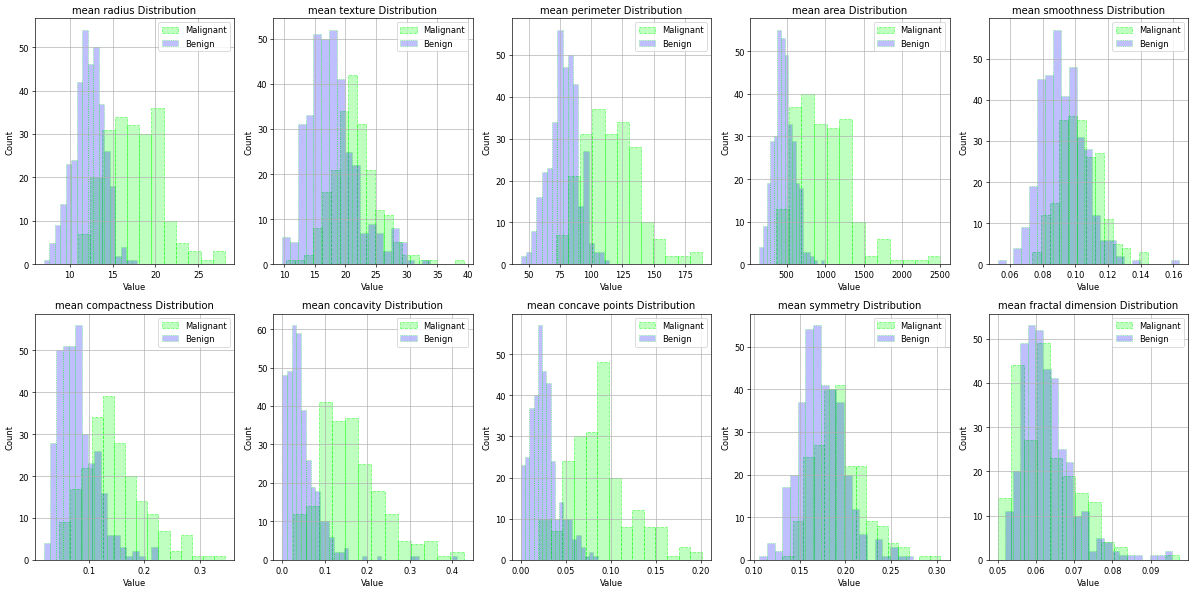

In [836]:
#histogram of first 10 feature with row =2 and column = 5
histograms_plot(df.columns[0:10],2,5)

<b align='center'>Histogram of all the Error features</b>

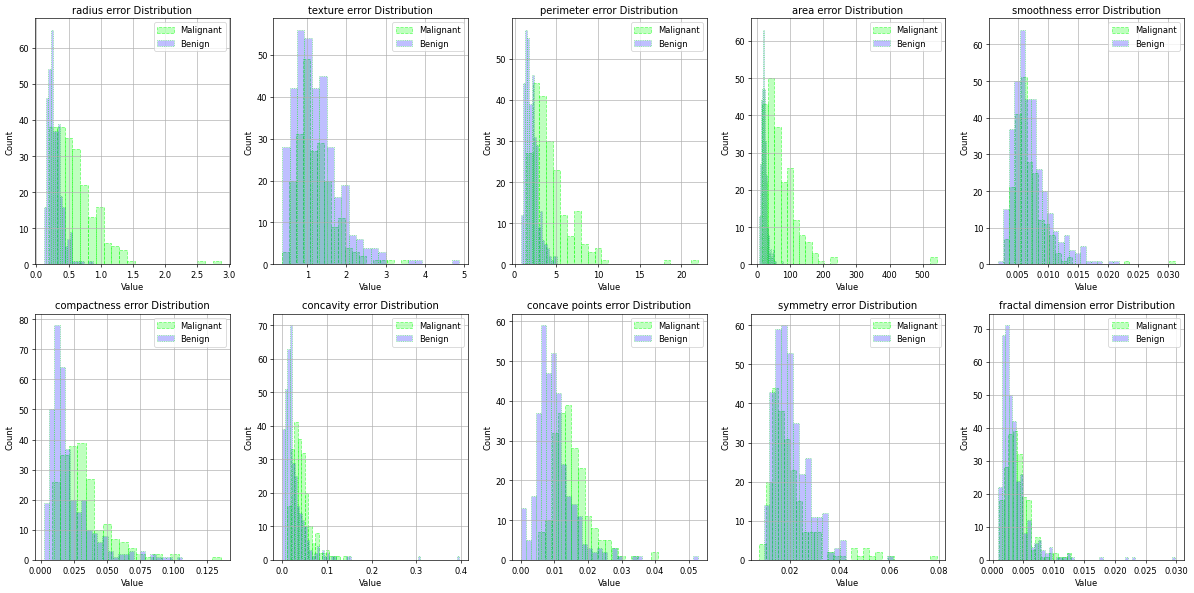

In [837]:
#histogram of next 10 feature with row =2 and column = 5
histograms_plot(df.columns[10:20],2,5)

<b align='center'>Histogram of all the Worst features</b>

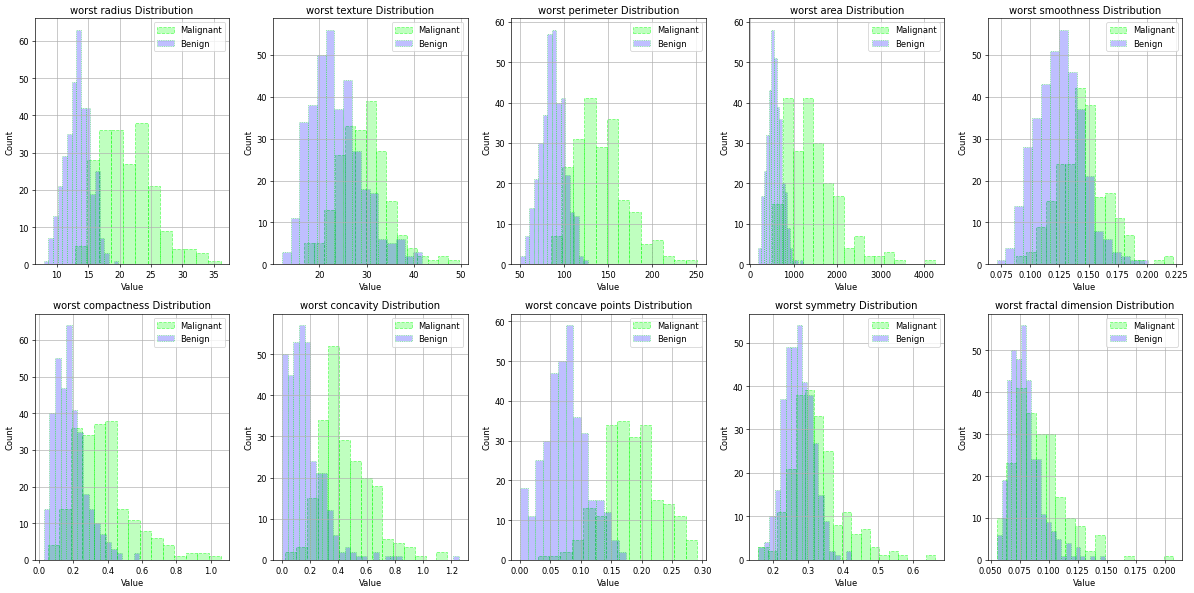

In [838]:
#histogram of next 10 feature with row =2 and column = 5
histograms_plot(df.columns[20:30],2,5)

<b>1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.</b>

<b>Steps performed to calculate ROC:</b>
<br />
For each of the feature Imagine a classifier with just one feature at a time that separates the data into two classes using a single threshold. 
Assume that the class with the smaller mean is below the threshold. 
If you move that threshold from a low value to a high value, then you can compare the prediction using each threshold with the actual target. 
This is an ROC curve that evaluates the feature individually. 
<br />

Plotted them together in one figure and make 10 subplots then you can compare each feature.


For each figure different ROC is calculated to make it more visible and AUC is marked in the legend.
<br />
<b>!!Explained by Prof. Stephan Lau on the Discussion Board and mail.</b> 


<br />Macro Average is used because macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally)

<b>Insights</b>

We are assuming the optimal theoritical minimum is 50 %<br />
Getting points below the identity line is something that simply happens. It's like getting an individual classifier that scores 45% correct even though the optimal theoretical minimum is 50%. That's just part of the variability with real data sets, and unless it is significantly less than expected based on chance, it isn't something you should worry too much about. E.g., if your classifier gets 20% correct, then clearly something is amiss and you might look into the specific reasons and fix your classifier.

<br />
<b>Learning</b><br />
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Note that the ROC does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy (TP +

TN)/(TP + TN + FN + FP) would favor classifiers that always predict a negative outcome for rare events.

Area under curve (AUC)

To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC. It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance, i.e. it is equivalent to the two sample Wilcoxon rank-sum statistic.

A classifier with high AUC can occassionally score worse in a specific region than another classifier with lower AUC. But in practice, the AUC performs well as a general measure of predictive accuracy.

In [839]:
#function to plot roc curve
def roc_plot(features, rows, cols):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fig=plt.figure(figsize=(20,10),dpi=60)
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df1 = df[feature].copy()
        df2 = df.iloc[:,30]
        df1 = df1.to_numpy()
        threshold = df1.copy()
        threshold.sort()
        n_classes = 569
        dff1 = df1.copy()
        count = 0
        for k in range(n_classes):
            for j in range(n_classes):
                if(df1[j]>threshold[k]):
                    dff1[j]=0
                else:
                    dff1[j]=1
            fpr[count], tpr[count],_ = roc_curve(df2,dff1)
            roc_auc[count] = auc(fpr[count], tpr[count])
            count = count+1
        lw =2
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        plt.plot(fpr["macro"], tpr["macro"],label='ROC curve (area = {0:0.4f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC ' + feature)
        plt.legend()
plt.show()

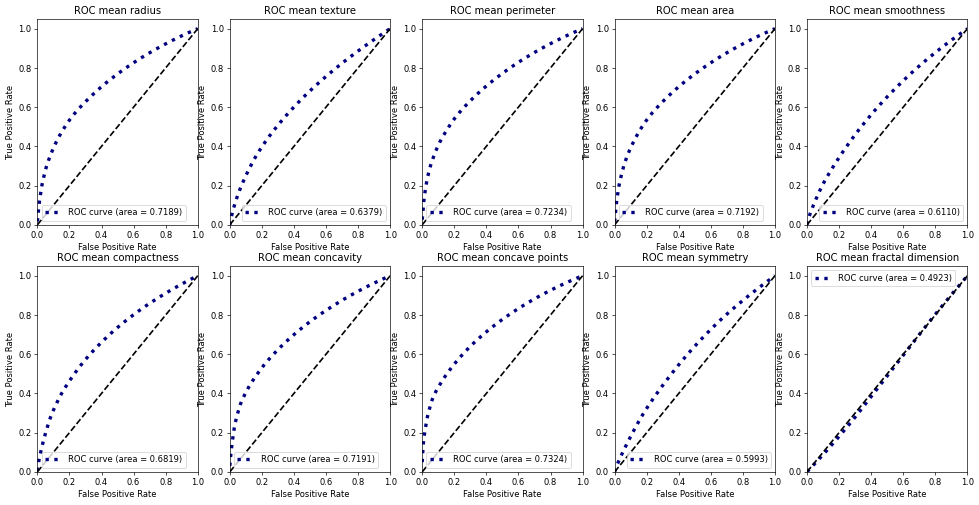

In [840]:
#function calling for first 10 features to plot roc FIGURE 1
roc_plot(df.columns[0:10],2,5)

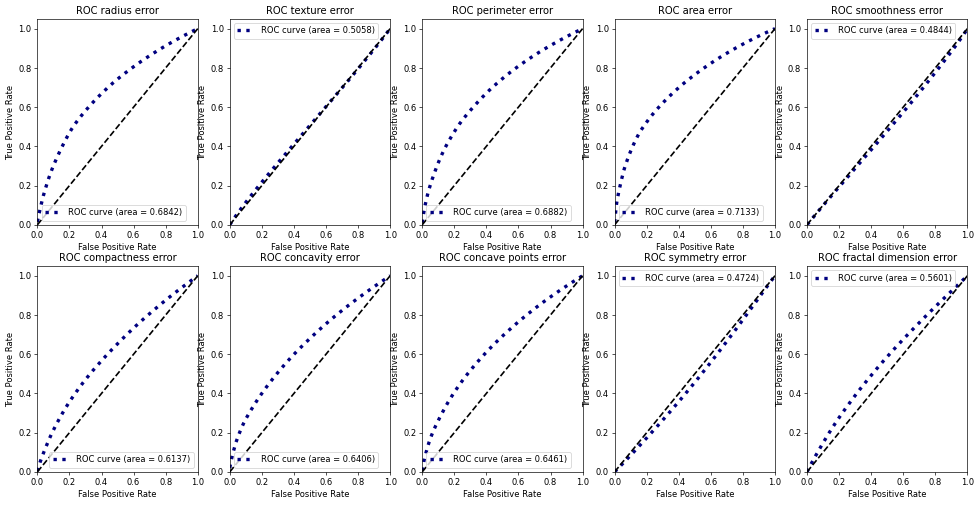

In [841]:
#function calling for next 10 features to plot roc FIGURE 2
roc_plot(df.columns[10:20],2,5)

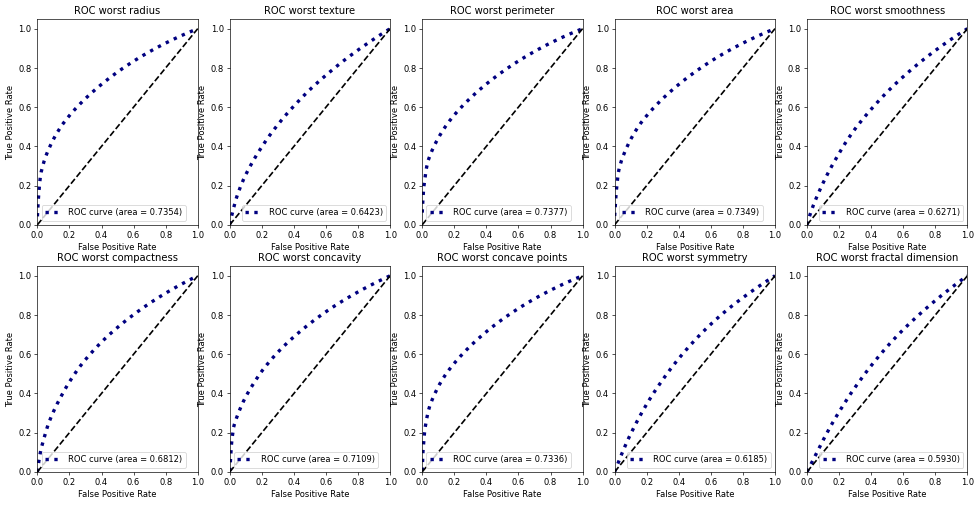

In [842]:
#function calling for next 10 features to plot roc FIGURE 3
roc_plot(df.columns[20:30],2,5)

<br />
<b>1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.</b>

<b>Answer:</b> 

Comparison of radius distribution by malignancy shows that there is no perfect separation between any of the features<br /> <br />
Large value of AUC tells that this is a good feature for classifier with proper separation in histogram and on the basis of that we have selected this.<br /><br /> 


we do have fairly good separations for worst concave points (AUC:0.7336), worst concavity(AUC:0.7109) , worst perimeter(AUC:0.7377), mean area(AUC:0.7192), mean perimeter (AUC:0.7294), mean concave points(AUC:0.7324), worst radius (AUC: 0.7354), area error(AUC: 0.7133)<br /><br />
We do have as well tight superposition for some of the values, like error symmetry(AUC: 0.4724), error smoothness(AUC:0.4844).<br /><br />

<b>Top five features based on histogram and ROC  using this concept are:</b><br />
<ol>
    <li>worst perimeter(AUC:0.7377)</li>
    <li>worst radius (AUC: 0.7354)</li>
    <li>mean concave points(AUC:0.7324)</li>
    <li>worst concave points (AUC:0.7336)</li>
    <li>area error (AUC: 0.7133)</li>
</ol>
<br />
The shape of a histogram can tell you a lot about the distribution of the data, as well as provide you with information about the mean, median, and mode of the data set.Some are left skewed and some are right skewed. Considering this with AUC we select the top best features. We see the clear separation in histogram with high value of ROC while selecting the above top 5 features.<br /><br />

<b>1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.</b>

<b>Explaination of Analysis Point<br />
It  is  a  point  in  the  feature  space  that  is approximately between both classes.</b><br />
'Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.'


To clarify further:The Analysis Point is one point in the feature space with 30 dimensions. So it is a vector of length 30. The mean should be calculated over each of the columns (features) in each class.
Analysis Point is not dependent on the size of each class, so that if they are very different sizes you do not end up with a point that is biased towards being near, or in, the biggest class.  Calculating separate means for each class and then taking the average of these will give you something that is between the classes regardless of the relative sizes.

Explaination by Professors!!

In [843]:
#analysis point
#mean when malignant
mean_m =df[df['target']==0].mean()
#mean when benign
mean_b =df[df['target']==1].mean()
#calculate the anaysis point
v = [mean_m , mean_b]
result = pd.concat(v,axis =1)
analysis_point = result.mean(axis =1)
print("Analysis Point are:\n",analysis_point)

Analysis Point are:
 mean radius                 14.804677
mean texture                19.759834
mean perimeter              96.720392
mean area                  720.583306
mean smoothness              0.097688
mean compactness             0.112636
mean concavity               0.103416
mean concave points          0.056854
mean symmetry                0.183547
mean fractal dimension       0.062774
radius error                 0.446582
texture error                1.215647
perimeter error              3.162125
area error                  46.903777
smoothness error             0.006988
compactness error            0.026860
concavity error              0.033910
concave points error         0.012459
symmetry error               0.020528
fractal dimension error      0.003849
worst radius                17.257306
worst texture               26.416639
worst perimeter            114.188134
worst area                 990.592880
worst smoothness             0.134902
worst compactness            

<b>2	Train a decision tree classifier (15%)</b>
<br /><br />
<b>
2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly.</b>

<br /><br />
<b>Answer:</b><br /><br />
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

When we need to change the parameters that are not automatically decided then it is known as hyperparameters.
<h4>Reason for selecting default values in 1 list and set of values in 2 list (for comparison between two)</h4>
<b> Hyper-Parameter </b><br /><br />
The Gini index is defined by 

<b>Gini index:</b><br />
                                    <b>G=K∑k=1ˆpmk(1−ˆpmk)</b>
                                    
a measure of total variance across the K classes. It is not hard to see that the Gini index takes on a small value if all of the ˆpmk’s are close to zero or one. For this reason the Gini index is referred to as a measure of node purity—a small value indicates that a node contains predominantly observations from a single class. An alternative to the Gini index is cross-entropy, given by

Cross-entropy:<br />
                                     <b>D=−K∑k=1ˆpmklog ˆpmk</b>
                                     
Since 0≤ˆpmk≤1, it follows that 0≤−ˆpmklog ˆpmk.
The cross-entropy will take on a value near zero if the ˆpmk’s are all nearzero or near one. Therefore, like the Gini index, the cross-entropy will takeon a small value if them th node is pure. In fact, it turns out that the Gini index and the cross-entropy are quite similar numerically.When building a classification tree,either the Gini index or the cross-entropy are typically used to evaluate the quality of a particular split,since these two approaches are more sensitive to node purity than is the classification error rate. 


<b>Random State:</b><br />
Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
random_state’s value may be:
None (default)
Use the global random state from numpy.random.
An integer
Use a new random number generator seeded by the given integer. To make a randomized algorithm deterministic (i.e. running it multiple times will produce the same result), an arbitrary integer random_state can be used. However, it may be worthwhile checking that your results are stable across a number of different distinct random seeds. Popular integer random seeds are 0 and 42.
A numpy.random.RandomState instance
Use the provided random state, only affecting other users of the same random state instance. Calling fit multiple times will reuse the same instance, and will produce different results.
utils.check_random_state is used internally to validate the input random_state and return a RandomState instance.

However, if a fixed value is assigned like random_state = 0 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

<b>Max Depth:</b><br />

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. So that's why selected 3 or none for hyperparameter search. This None will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting.


<b>Min Samples Leaf:</b><br />

The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree. The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node. So value given between (1,9).

<b>Min Sample Split:</b><br />

The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
So in first it's keep as default which is 2 and in next grid it's selected between 1 to 9 to compare between both.

<b>Mean Weight Fraction Leaf</b><br />

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. So in this data its not provided so in default it is kept as 0 and in next grid between 0 and 9 but we can see that default 0 is better.

<b>Max Features</b><br />

The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

So for the best partition in grid2 values between 1 to 9 is used but in grid1 default is used so we can aplit on the basis of srt using 'AUTO'

<b>Max Leaf Nodes</b><br />

Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. So in grid2 1,2,3,None is used but in grid 1 default value None is used.

<b>Min Impurity Decrease</b><br />

A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)

where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.
So in grid 1 default 0 is used and in grid2 values between 0.0 to 0.5 but we want to keep it as 0 as it is related to split if this split induces a decrease of the impurity greater than or equal to this value. So default 0.


<b>Min Impurity Split</b><br />

Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. So in grid1 default value e^-7 is used and its the depreciated method so not used and not taken in consideration.

<b>Class Weight</b><br />

Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

For multi-output, the weights of each column of y will be multiplied.

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.
So in grid 2 balanced and none is passed but in grid 1 default value none is selected.


Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features
<h3 align = 'center'> Approach used and Observation</h3><br /><br />
Two grid is created in first only hyperparameter search is applied only on Max Depth and Min Samples Leaf and in other parameter grid apart from these two hyperparameter other values are also considered and compared. It is found that when we are using the second grid in which we are changing all the values then it is just overfittin the tree. To do this RandomSearch approach is used and then using metric both are compared. So when we are keeping all the values default then it's a good classifier.


Best Parameters for default fit:{'min_samples_leaf': 3, 'max_depth': 3} 




Best Score for default fit: 0.9211893369788108 




Best Parameters when changing all parameters:{'class_weight': 'balanced', 'max_depth': None, 'max_features': 5, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 7, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.2} 




Best Score when changing all parameters: 0.9263841421736159 




Confusion matrix for default parameters: [[ 61   6]
 [  8 113]] 




Confusion matrix while changing parameters: [[ 59   8]
 [ 13 108]] 






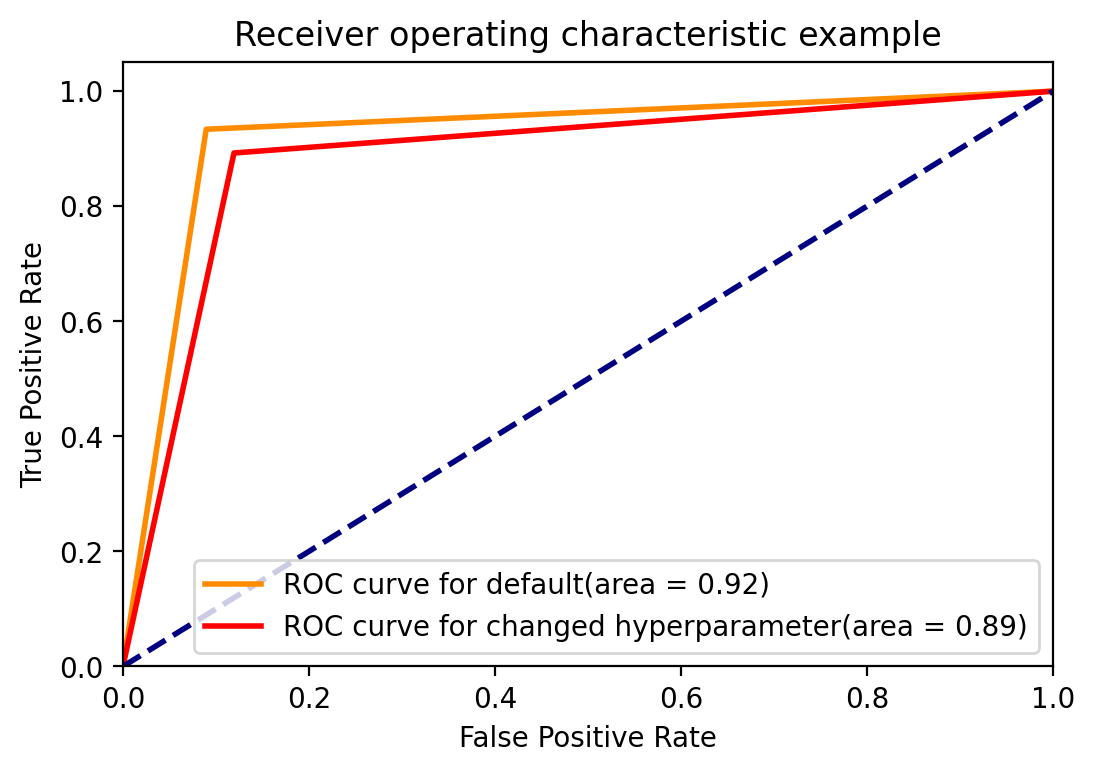

For Default parameter list:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        67
           1       0.95      0.93      0.94       121

    accuracy                           0.93       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188
 




Changing all the parameters:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        67
           1       0.93      0.89      0.91       121

    accuracy                           0.89       188
   macro avg       0.88      0.89      0.88       188
weighted avg       0.89      0.89      0.89       188



In [844]:
#comparison using Randomized Search for both default and chaging values
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import randint
import random
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import warnings
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#parameter set 1
param_dist = {"max_depth":[3,None],"min_samples_leaf":np.arange(1,9)}
#parameter set 2
param_dist1 = {"max_depth":[3,None],
             "min_samples_leaf":randint(1,9),
            "min_samples_split": randint(1,9),
            "max_features":randint(1,9),
            "min_impurity_decrease":[0.0,0.1,0.2,0.3,0.4,0.5],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
            "max_leaf_nodes":[1,2,3,None], 
            "class_weight":['balanced',None]
             }
tree_cv = RandomizedSearchCV(clf,param_dist,cv=5)
tree_cv1 = RandomizedSearchCV(clf,param_dist1,cv=5)
warnings.simplefilter("ignore")
tree_cv.fit(X_train,y_train)
tree_cv1.fit(X_train,y_train)
print("Best Parameters for default fit:{}".format(tree_cv.best_params_),"\n\n\n\n")
print("Best Score for default fit: {}".format(tree_cv.best_score_),"\n\n\n\n")
print("Best Parameters when changing all parameters:{}".format(tree_cv1.best_params_),"\n\n\n\n")
print("Best Score when changing all parameters: {}".format(tree_cv1.best_score_),"\n\n\n\n")
y_pred = tree_cv.predict(X_test)
y_pred1 = tree_cv1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred1)
print("Confusion matrix for default parameters:",cm,"\n\n\n\n")
print("Confusion matrix while changing parameters:", cm1,"\n\n\n\n")
## can be seen that overfitting the data as training data has hogh score in when all the parameters are changing
##but not in case of test data so overfitting
fpr, tpr, _ = roc_curve(y_test, y_pred)
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)

roc_auc= auc(fpr, tpr)
roc_auc1= auc(fpr1, tpr1)
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve for default(area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='red',lw=2, label='ROC curve for changed hyperparameter(area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("For Default parameter list:\n",classification_report(y_test, y_pred),"\n\n\n\n")
print("Changing all the parameters:\n",classification_report(y_test, y_pred1))

<b>Observations:</b><br /><br />

Default approach is better than as compared to changing values of all the parameters as it is overfitting the data 

<b>2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?</b>

In [845]:
#loading all the files
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import decomposition

In [846]:
#making pipeline
# most of the pre-processing steps are done in previous step for comparison like split etc...
sc = StandardScaler()
# for showing that scaling is not required this pipeline is used
pipe = Pipeline(steps=[('sc', sc),('decisiontree', tree_cv)])
#this will be used in grid search
pipe1 = Pipeline(steps=[('sc', sc),('decisiontree', DecisionTreeClassifier())])
print(pipe)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontree',
                 RandomizedSearchCV(cv=5, error_score=nan,
                                    estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_sa

<b>Do the data need to be scaled for decision tree classification?</b><br /><br />
decision trees in in general don't usually require scaling. However, it helps with data visualization/manipulation, and might be useful if you intend to to compare performance with other data or other methods like SVM. <br />
Decision tree based models take decisions on the basis of parameters.

So if you have a variable called X, this variable can take multiple values. Now in a decision tree model, a tree is formed on the basis of micro decisions that the algorithm makes to form a tree. And example of this micro decision could be,

If 50 > X > 100.(there are really two decisions here)

If it is, then the algorithm forms a different learning tree branch otherwise it forms a different branch of the tree.

Now if those feature values were to be scaled down let's say by 100

0.5 > X/100 > 1 even then the decision wouldn't have changed. Keep in mind the value of X has also been scaled down by the same factor.

Hence, decision tree models like Random forest, extratrees, XGboost etc. don't require scaling of feature values to converge to the minima.<br />

So it's not just scaling here - if you have a strictly positive variable and a non-stochastic tree (so setting the same random seed should do the trick for most implementations of a random forest) - you'll get the same predictions if you use, e.g., a log transform on that variable, as long as you do so consistently (to all of the data).

The intuition though, is that the tree builds hyper rectangles in the data space. For each dimension, an edge of a hyper rectangle is defined by a point. Since the point only depends on relative position, “clearly” the tree will be the same regardless of whether we have applied a monotonic transformation to any single variable.

In [847]:
#we are just scaling the data and then again fitting the model to try if this make some effect
pipe.fit(X_train,y_train)
pipe_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test,pipe_pred)
print(classification_report(y_test,pipe_pred),"\n\n")
print("Confusion Matrix:\n",cm)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.95      0.96      0.95       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188
 


Confusion Matrix:
 [[ 61   6]
 [  5 116]]


<h3>Observation</h3>
So there is no effect of scaling on decision tree as we are getting same results and same confusion matrix and we have also explained it using matehematics. <br /><b>Hence proved there is no effect of scaling in decision tree so there is no need of adding scaling in decisiontree we have just added it in pipeline to show these results.</b>

<b>Are the different class sizes a problem, and if so what are you doing about it?</b><br />


The decision tree algorithm is effective for balanced classification, although it does not perform well on imbalanced datasets.

The split points of the tree are chosen to best separate examples into two groups with minimum mixing. When both groups are dominated by examples from one class, the criterion used to select a split point will see good separation, when in fact, the examples from the minority class are being ignored.

This problem can be overcome by modifying the criterion used to evaluate split points to take the importance of each class into account, referred to generally as the weighted split-point or weighted decision tree.

<br />3 Solutions <br/> 
The following four ideas may help you tackle this problem.

 Select an appropriate performance measure and then fine tune the hyperparameters of your model --e.g. regularization-- to attain satisfactory results on the Cross-Validation dataset and once satisfied, test your model on the testing dataset. For these purposes, set apart 15% of your data to be used for cross validation and 15% to be used for final testing. 

Try to maximize this figure on the Cross-Validation dataset and make sure that the performance is stable on the testing dataset as well.

Use the 'prior' parameter in the Decision Trees to inform the algorithm of the prior frequency of the classes in the dataset, i.e. if there are 1,000 positives in a 1,000,0000 dataset set prior = c(0.001, 0.999) (in R).

Use the 'weights' argument in the classification function you use to penalize severely the algorithm for misclassifications of the rare positive cases

Use the 'cost' argument in some classification algorithms -- e.g. rpart in R-- to define relative costs for misclassifications of true positives and true negatives. You naturally should set a high cost for the misclassification of the rare class.

<br /><br />
Let’s take a look at some popular methods for dealing with class imbalance.
1. Change the performance metric

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
F1: Score: the weighted average of precision and recall.
    
<br /><br />  
2. Resampling Techniques — Oversample minority class

Our next method begins our resampling techniques.

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.
Important Note

Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

<br /><br />
3. Resampling techniques — Undersample majority class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.


Here the dataset is 60:40 so there is not much need. <br />

Pruning could be required<br />
<b>However,<br/>We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class and use the appropriate metrics as mentioned one of the solutions.</b>
<b>We are using class weight as balanced as a solution of this.</b>

<br /><br />

<b>2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?</b>

In [848]:
#importing library
from sklearn.model_selection import GridSearchCV, cross_val_score
#creating parameter grid
param_grid = {"decisiontree__max_depth":[np.arange(3,15),None],"decisiontree__min_samples_leaf":np.arange(3,15),
            "decisiontree__class_weight":['balanced',None]
             }
#using pipe 
grid = GridSearchCV(pipe1,param_grid,cv=5)
#fitting using the model
grid.fit(X_train,y_train)
#predicting the model
y_predG = grid.predict(X_test)
#confusion matrix
cm_g = confusion_matrix(y_test,y_predG)
#printing the metrics
print("CV Score for tarining:",grid.score(X_train,y_train))
print("\n\nBest Parameters:{}".format(grid.best_params_))
print("\n\nBest Score: {}".format(grid.best_score_))
print("\n\nConfusion matrix:\n",cm_g)

CV Score for tarining: 0.9448818897637795


Best Parameters:{'decisiontree__class_weight': None, 'decisiontree__max_depth': None, 'decisiontree__min_samples_leaf': 9}


Best Score: 0.9290157211209843


Confusion matrix:
 [[ 61   6]
 [  3 118]]


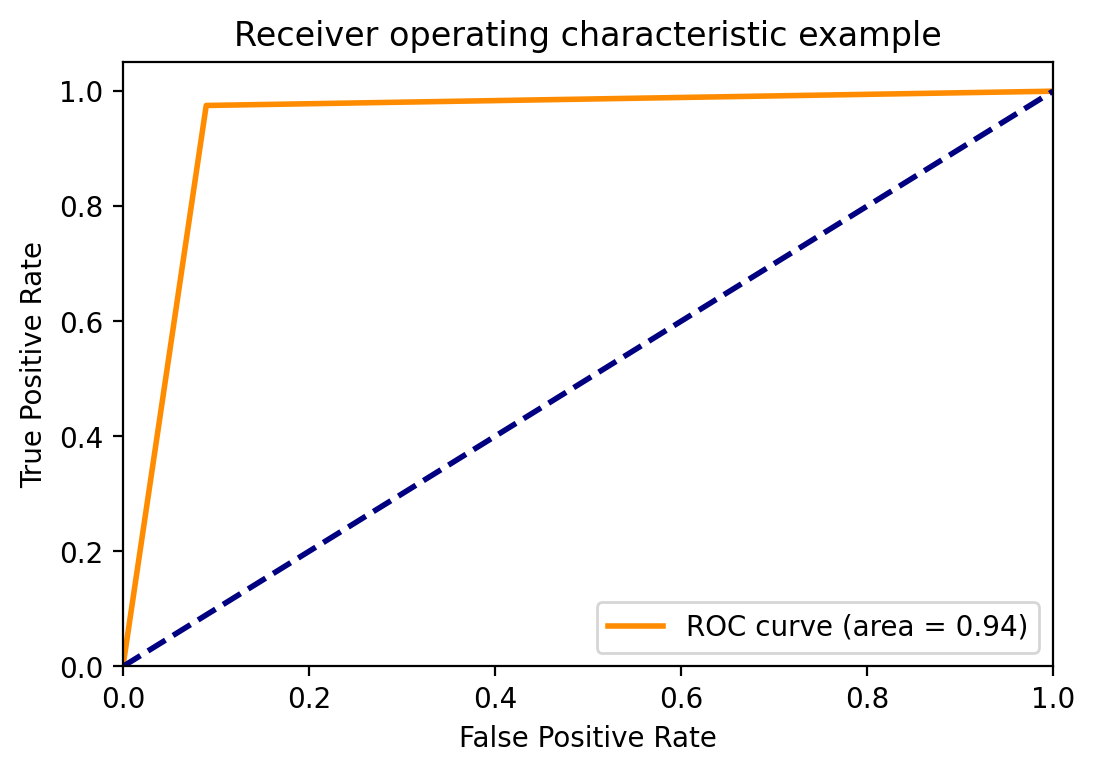

In [849]:
#some metrics 
fpr, tpr, _ = roc_curve(y_test, y_predG)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<b>Answer:</b> <br />
From the above results we can observe that class weight None is the best hyperparameter when max depth is none and minimum sample leaf is 9. As class weight is not given so If not given, all classes are supposed to have weight one. and max depth as none as nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples with min sample leaf parameter to limit the growth of the tree. The minimum number of samples required to be at a leaf node


<b>Observation:</b><br />
From the above results we ca see that GridSearch is giving better results when compared with RandomizedSearch. The randomized search and the grid search explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower.
The performance is may slightly worse for the randomized search, and is likely due to a noise effect and would not carry over to a held-out test set.

<h3 align = center>Some Visuals and Insights</h3>
<br />
<b>Some insights before moving to the next part as it is imprtant to uderstand the data</b><br />

In [850]:
#Description of the dataset
import seaborn as sns
#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1

# Number of malignant cases
malignant = len(df[df['target']==0])

#Number of benign cases
benign = len(df[df['target']==1])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print ("\nThere are ", str(len(df))," cases in this dataset")
print ("\nThere are {}".format(features)," features in this dataset")
print ("\nThere are {}".format(malignant)," cases diagnosed as malignant tumor")
print ("\nThere are {}".format(benign)," cases diagnosed as benign tumor")
print ("\nThe percentage of malignant cases is: {:.4f}%".format(rate))
print ("\nThe percentage of benign cases is: {:.4f}%".format(100-rate))
print("\nUnique:",df.target.unique())


There are  569  cases in this dataset

There are 30  features in this dataset

There are 212  cases diagnosed as malignant tumor

There are 357  cases diagnosed as benign tumor

The percentage of malignant cases is: 37.2583%

The percentage of benign cases is: 62.7417%

Unique: [0 1]


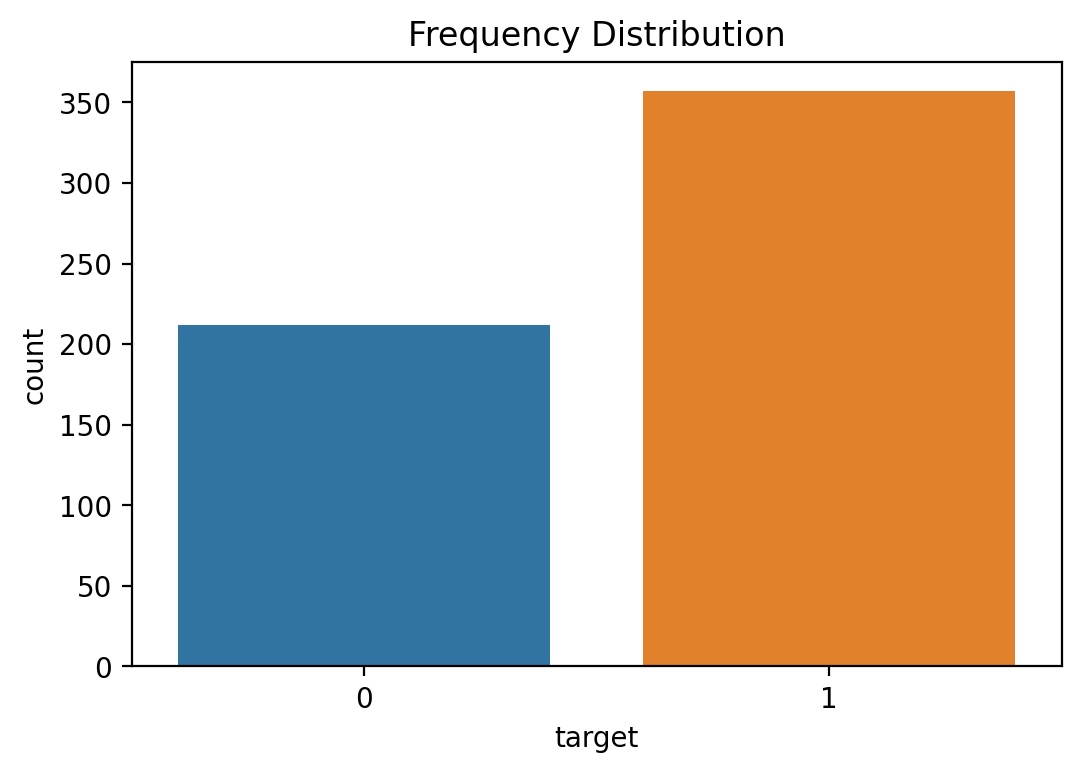

Data is little biased towards Benign


<Figure size 4000x2000 with 0 Axes>

In [851]:
#count plot
sns.countplot(df['target'], label = "Count") 
plt.title('Frequency Distribution')
plt.show()
plt.figure(figsize=(20,10)) 
print("Data is little biased towards Benign")

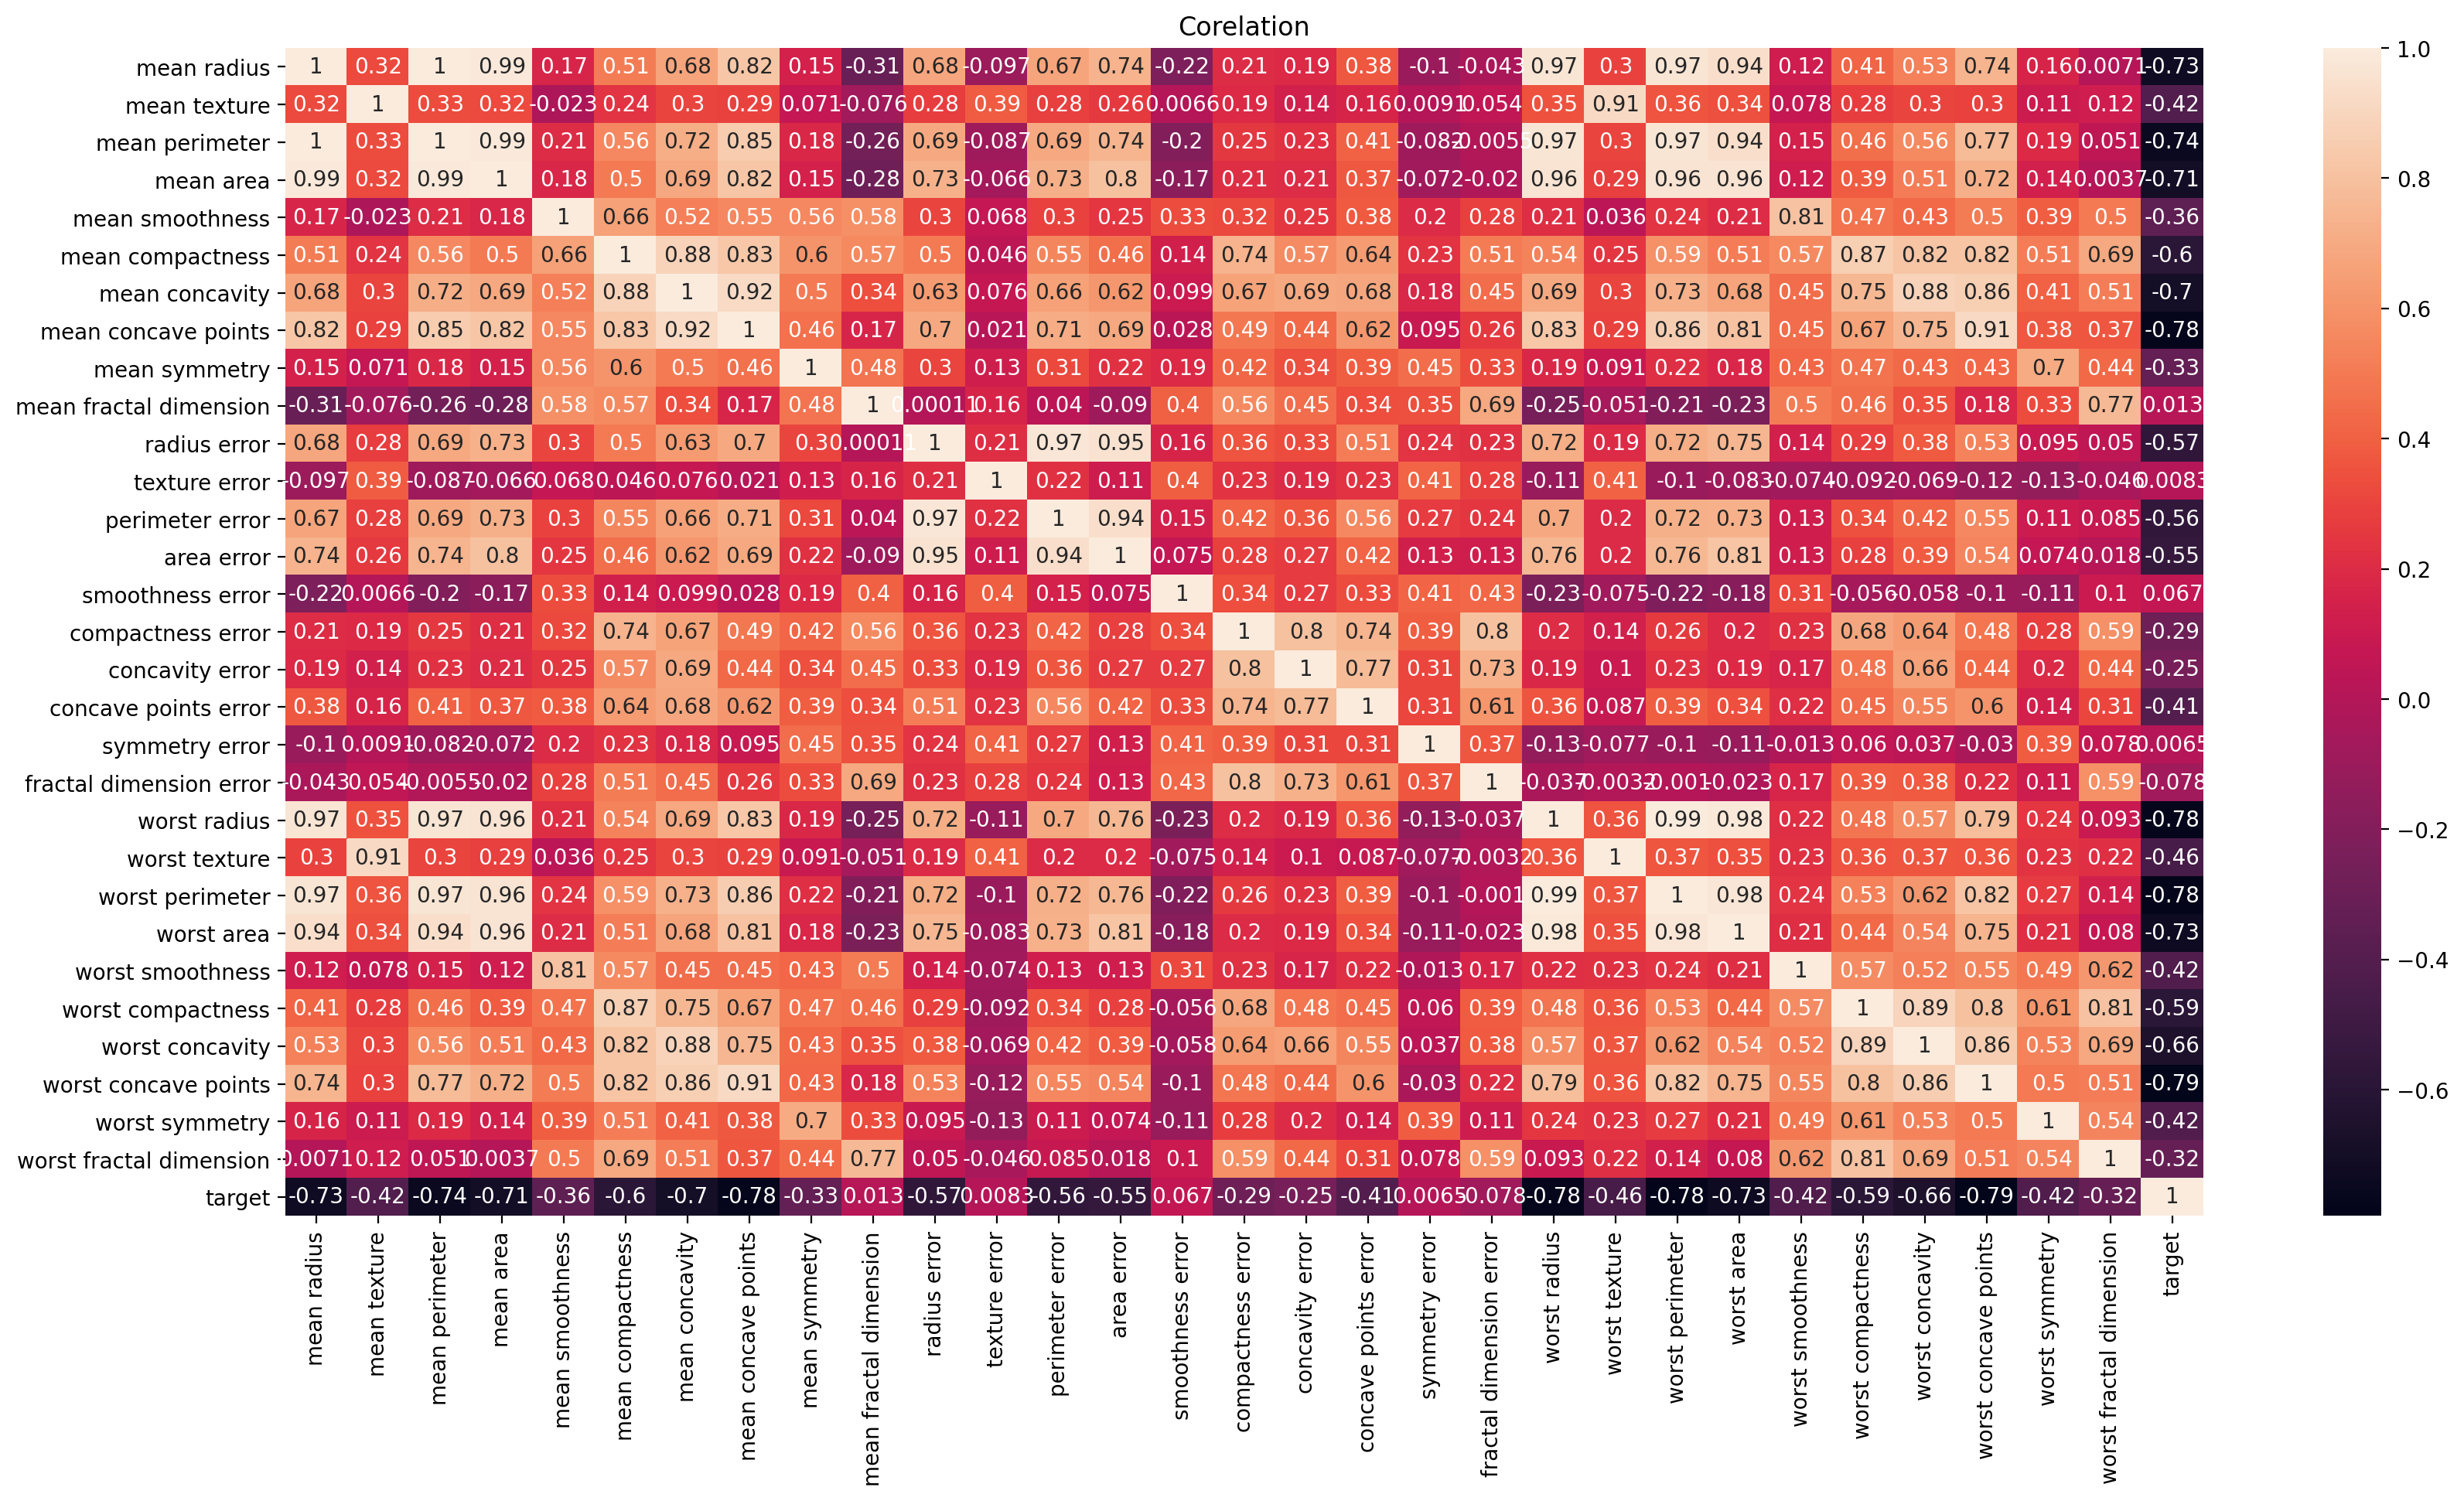

In [852]:
#Heat Map between all features
plt.figure(figsize=(20,10)) 
plt.title('Corelation')
sns.heatmap(df.corr(), annot=True) 
plt.show()

Text(0.5, 1.0, 'Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')

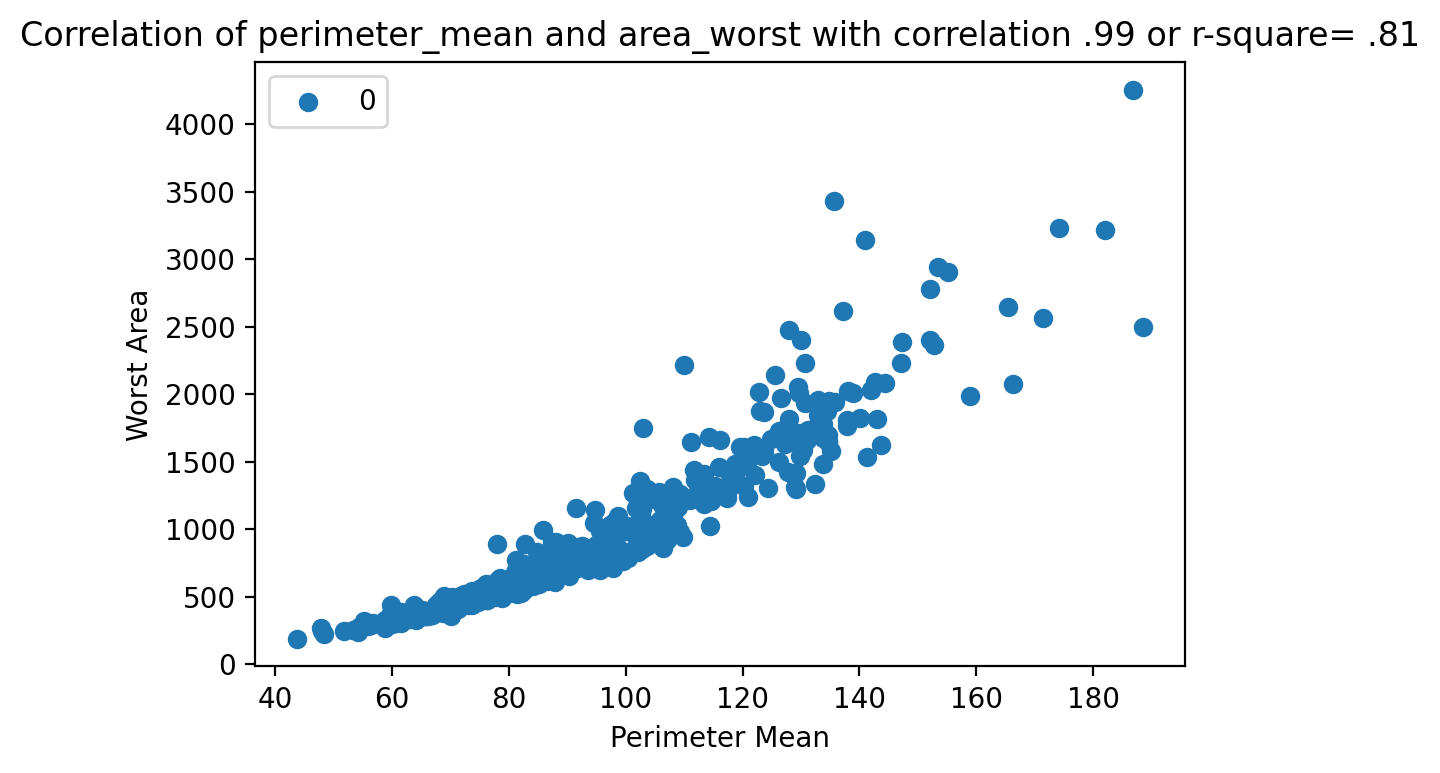

In [853]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['mean perimeter']
    y=df['worst area']
    ax.scatter(x,y, label=str(i))
ax.legend()
ax.set_xlabel("Perimeter Mean")
ax.set_ylabel("Worst Area")
ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')

<b>3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?</b>


Confusion matrix:
 [[ 61   6]
 [  3 118]]


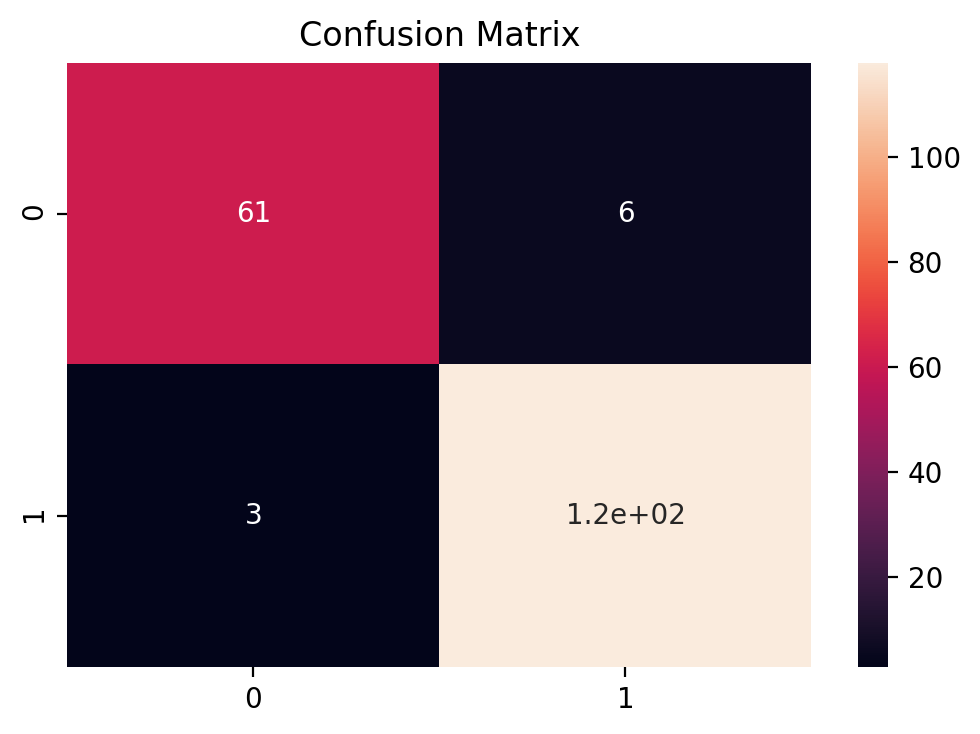

In [854]:
#Confusion Matrix
cm_g = confusion_matrix(y_test,y_predG)
print("\nConfusion matrix:\n",cm_g)
#Heat map of confusion matrix
sns.heatmap(cm_g, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [855]:
#Classification Report for all the metrics
print(classification_report(y_test, y_predG))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188




FPR: [0.         0.08955224 1.        ]

TPR: [0.         0.97520661 1.        ]


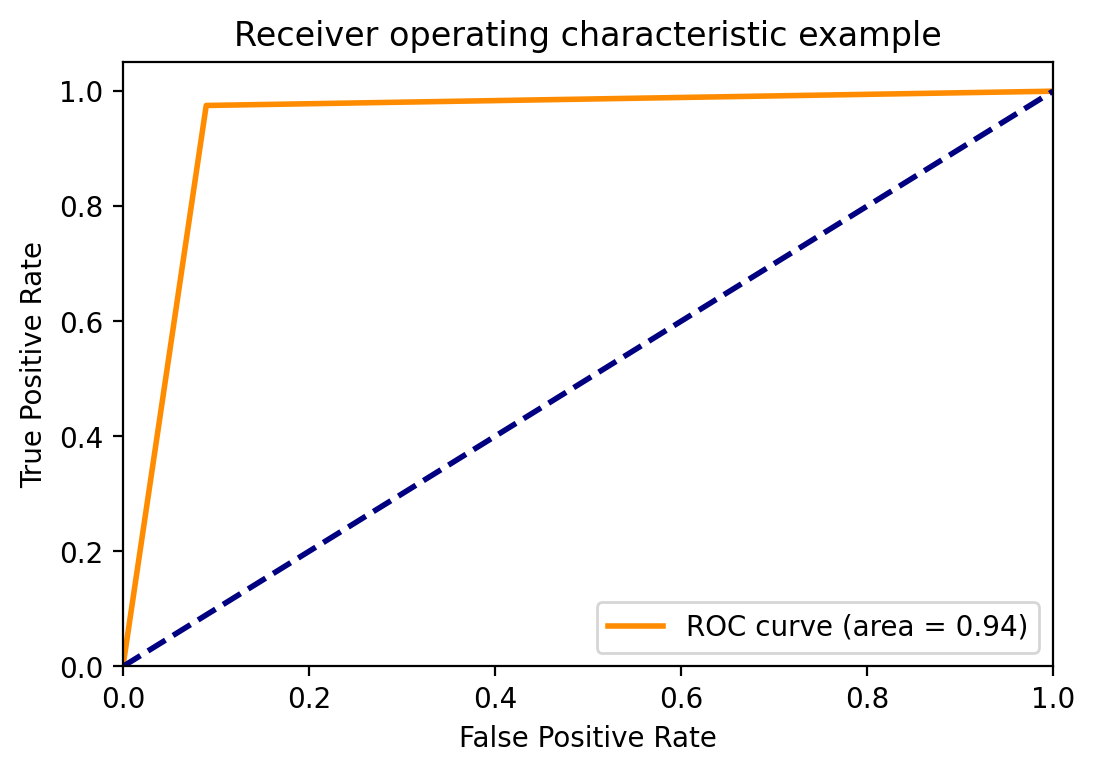

In [856]:
#Calculating fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_predG)
print("\nFPR:",fpr)
print("\nTPR:",tpr)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [857]:
#more metrics
from sklearn.metrics import average_precision_score,recall_score,precision_score,precision_recall_curve
b_r=recall_score(y_test, y_predG, average='binary')
b_p = precision_score(y_test, y_predG, average='binary')
precision, recall, _ = precision_recall_curve(y_test,y_predG)
average_precision = average_precision_score(y_test, y_predG)
print('\nPrecision Array:',precision)
print('\nRecall Array:',recall)
print('\nPrecision:',b_p)
print('\nRecall:',b_r)
print('\nAverage precision-recall score: {0:0.2f}'.format(average_precision))


Precision Array: [0.64361702 0.9516129  1.        ]

Recall Array: [1.         0.97520661 0.        ]

Precision: 0.9516129032258065

Recall: 0.9752066115702479

Average precision-recall score: 0.94


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.94')

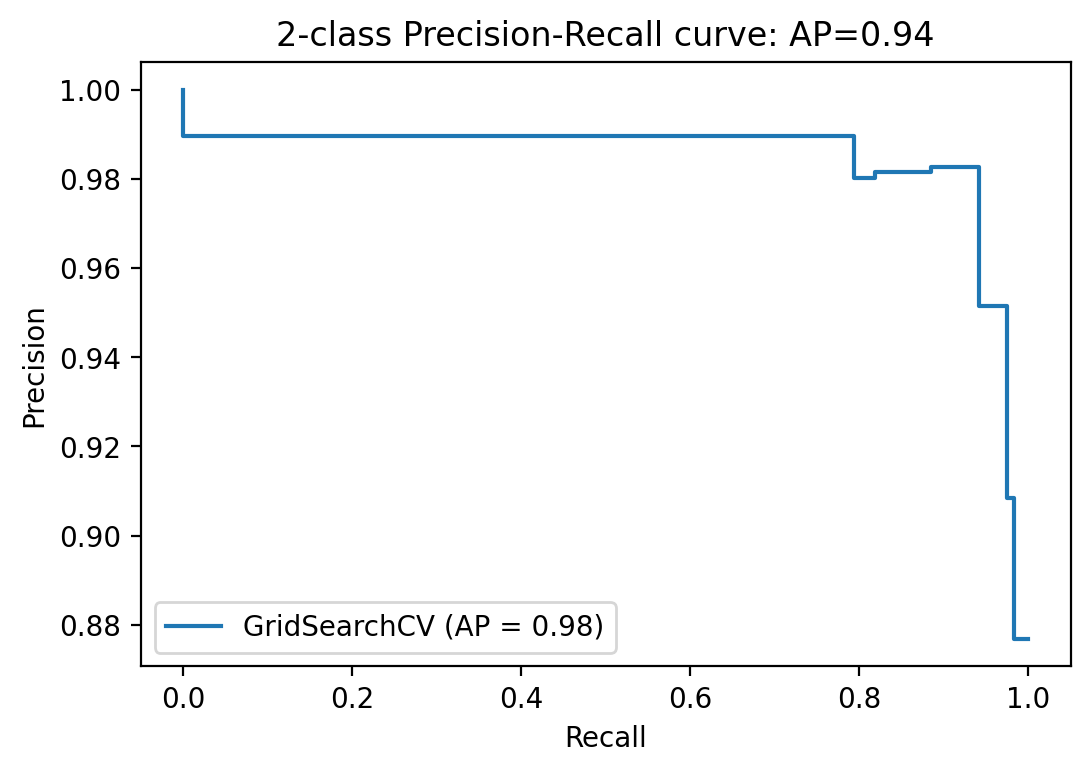

In [858]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(grid, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

<b>Answer:</b>
According to confusion metrics Diagonal elements are good and Off-Diagonal elements show errors.
So off diagonal elements are False Positive and False Negative so in this case 7 + 3 = 10 cases are interpreted incorrectly. So chance of of failing to detect a sample with cancer is the odd of failure which is given by Probab of failure divide by probab of success.

In [859]:
#Caculating the chance of failure
chance_fail = (cm_g[0,1] + cm_g[1,0])/(cm_g[0,0] + cm_g[1,1])
print("\nChance of failing:",chance_fail)


Chance of failing: 0.05027932960893855


<b>The strengths and weaknesses of the Decision Tree Classifier</b><br />
<b>Strengths</b> <br />

Inexpensive to construct.<br />
Extremely fast at classifying unknown records.<br />
Easy to interpret for small-sized trees<br />
Accuracy comparable to other classification techniques for many simple data sets.<br />
Excludes unimportant features.<br />
1.Trees can easily handle qualitative predictors without the need tocreate dummy variables.

2.Trees can be displayed graphically, and are easily interpreted even byanon-expert(especially if they are small).

3.Decision trees perform classification without requiring much computation.

4.Decision trees are able to handle both continuous and categorical variables.

5.Decision trees provide a clear indication of which fields are most important for prediction or classification.

6.Some people believe that decisiontrees more closely mirror humandecision-making than do the regression and classification approaches

7.Trees are very easy to explain. In fact, they are even easier to explain than linear regression!

Conclusion from above points:  
Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
A decision tree does not require normalization of data.
A decision tree does not require scaling of data as well.
Missing values in the data also does NOT affect the process of building decision tree to any considerable extent.
A Decision trees model is very intuitive and easy to explain to technical teams as well as stakeholders.



<b>Weakness</b><br />

Easy to overfit.<br />
Decision Boundary restricted to being parallel to attribute axes.<br />
Decision tree models are often biased toward splits on features having a large number of levels.<br />
Small changes in the training data can result in large changes to decision logic.<br />
Large trees can be difficult to interpret and the decisions they make may seem counter intuitive.<br />
1.Unfortunately, trees generally do not have the same level of predictiveaccuracy as some of the other regression and classification approaches. However, by aggregating many decision trees, using methods likebagging,random forests,andboosting,thepredictiveperformance of trees can besubstantially improved. 

2.Decision trees are prone to errors in classification problems with many class and relatively small number of training examples. (Imbalance due to size).

3.Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared. 

The one downside is they are high variance classifiers i.e. the DT learnt is sensitive to the precise layout of points and, if you have less data, can fit to noise.

Conlusion from above points:<br />
A small change in the data can cause a large change in the structure of the decision tree causing instability.
For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
Decision tree often involves higher time to train the model.
Decision tree training is relatively expensive as complexity and time taken is more.
Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

<b>3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?</b>

[Text(465.0, 553.6666666666666, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(310.0, 453.0, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(232.5, 352.3333333333333, 'X[13] <= 34.405\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(155.0, 251.66666666666663, 'X[21] <= 30.145\ngini = 0.019\nsamples = 205\nvalue = [2, 203]'),
 Text(77.5, 151.0, 'gini = 0.0\nsamples = 180\nvalue = [0, 180]'),
 Text(232.5, 151.0, 'X[26] <= 0.201\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(155.0, 50.33333333333326, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(310.0, 50.33333333333326, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(310.0, 251.66666666666663, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(387.5, 352.3333333333333, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(620.0, 453.0, 'X[22] <= 90.38\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(542.5, 352.3333333333333, 'gini = 0.219\nsamples = 8\nval

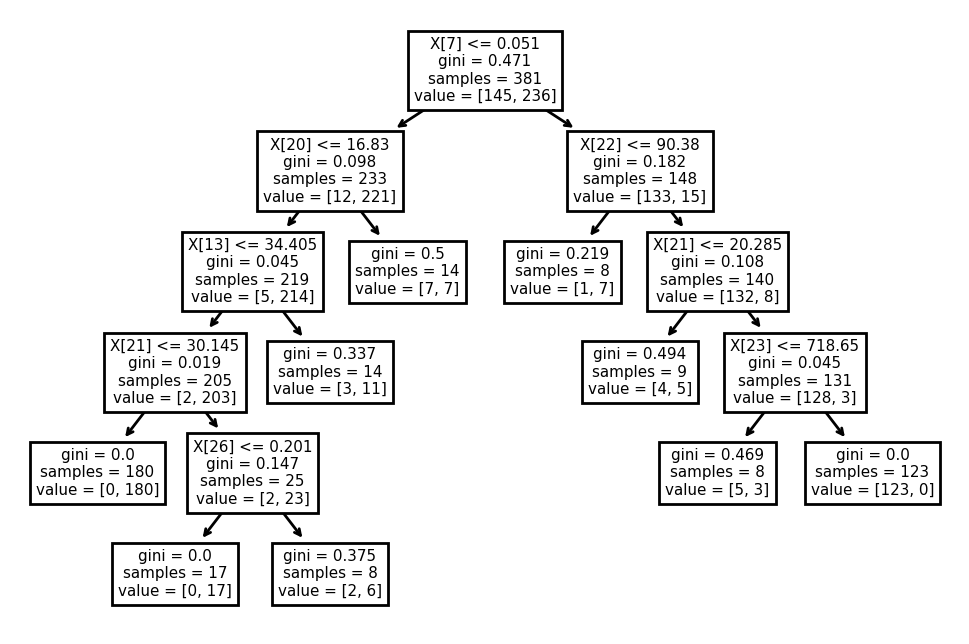

In [860]:
#displaying decision tree using the best parameters that we got in the grid search
from sklearn import tree
import matplotlib as mpl
mpl.rc('figure', dpi=200)
clf = tree.DecisionTreeClassifier(random_state=0, class_weight=None,max_depth=None,min_samples_leaf=8)
clf24 = tree.DecisionTreeClassifier(random_state=0, class_weight=None,max_depth=None,min_samples_leaf=8)
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf)

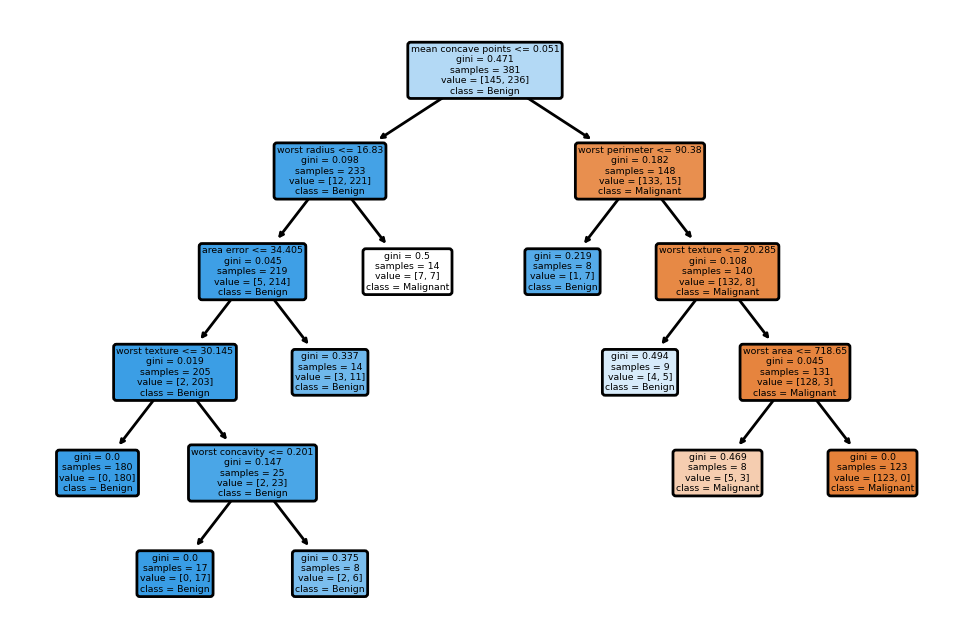

In [861]:
#making it more clear by using color represenation
a = tree.plot_tree(clf,feature_names=X_train.columns,class_names=['Malignant','Benign'],filled=True,rounded=True,)

<b>Answer:</b><br />
Process used in making Decision Tree Classifier:<br />
1.Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest Gini Index(GI) (reduction in uncertainty towards the final decision). <br />
2.In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class.<br />
3.In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.<br />



<b>Structure</b><br />
Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.<br />
Splitting: It is a process of dividing a node into two or more sub-nodes.<br />
Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.<br />
Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.<br />
Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.<br />
Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.<br />
Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.<br />

<b>Structure here</b><br />
Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets. So, here <b>mean concave points</b> dividing the samples into 145 and 236 which is approx (40-60%) into two set and it is decided as it is on the basis of GI.

So by observing the tree we can say that left node is Benign and right node is malignant.
In the structure first feature and its value is mentioned if smaller or equal to that value move to left otherwise right. Then gini value is mentioned which will tell about the purity then total number of samples and division of that samples are mentioned in the values and at the last class is mentioned.

Left Structure of the tree:

Again based on the GI worst radius is selected which is again dividing into two nodes.If it's greater the values specified in the tree then malignant otherwise again GI is considered and area error then worst texture is selected as the child node. If the values is less then the given value then benign otherwise again worst concativity is chosen and benign is found.

Right Structure of the tree:

Again based on the IG worst perimeter is selected and if left node then benign and if right node then worst texture is chosen and if left benign otherwise worst area is chosen then malignant. All these are done on the basis of IG only.





In [862]:
##Are the features in the decision tree matching the initial candidate features from Section 1?
print(dict(zip(X.columns, clf.feature_importances_)))
d = dict(zip(X.columns, clf.feature_importances_))
imp_tree = pd.DataFrame(d.items()) 
#selecting top 7 features used in decision tree
imp_tree = imp_tree.nlargest(7, [1])
#selecting top 5 features used in decision tree for plotting in next part
imp= imp_tree.nlargest(5, [1])
print("\nImportant features of the this tree:\n",imp_tree)

{'mean radius': 0.0, 'mean texture': 0.0, 'mean perimeter': 0.0, 'mean area': 0.0, 'mean smoothness': 0.0, 'mean compactness': 0.0, 'mean concavity': 0.0, 'mean concave points': 0.8382650793389987, 'mean symmetry': 0.0, 'mean fractal dimension': 0.0, 'radius error': 0.0, 'texture error': 0.0, 'perimeter error': 0.0, 'area error': 0.007074925323390678, 'smoothness error': 0.0, 'compactness error': 0.0, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.0, 'fractal dimension error': 0.0, 'worst radius': 0.03866626739650868, 'worst texture': 0.03264841874054951, 'worst perimeter': 0.06532552046451648, 'worst area': 0.013631950722187751, 'worst smoothness': 0.0, 'worst compactness': 0.0, 'worst concavity': 0.004387838013848187, 'worst concave points': 0.0, 'worst symmetry': 0.0, 'worst fractal dimension': 0.0}

Important features of the this tree:
                       0         1
7   mean concave points  0.838265
22      worst perimeter  0.065326
20         worst ra

<b>Above shown are the top features of the decision tree.</b><br />

<b>Important features of the this tree:</b><br />
           
mean concave points  0.838265<br />
worst perimeter  0.065326<br />
worst radius  0.038666<br />
worst texture  0.032648<br />
worst area  0.013632<br />
area error  0.007075<br />
worst concavity  0.004388<br />

<br />

In the section 1 we observed that
<b>Top five features based on histogram and ROC  using this concept are:</b><br />
<ol>
    <li>worst perimeter(AUC:0.7377)</li>
    <li>worst radius (AUC: 0.7354)</li>
    <li>mean concave points(AUC:0.7324)</li>
    <li>worst concave points (AUC:0.7336)</li>
    <li>area error (AUC: 0.7133)</li>
</ol>
<br />
<b>Comparing both</b><br />
The features that are same in both are:<br />
1.Mean concave points<br />
2.Worst Perimeter<br />
3.Worst Radius<br />
4.Area Error<br />
<br /><br />

<b>We can say that out of 5 features we predicted on the basis of Histogram and ROC, Decision tree is using 4 of them. So the features are matching.</b>

Number of nodes in the last tree is: 1 with ccp_alpha: 0.34096886607465876


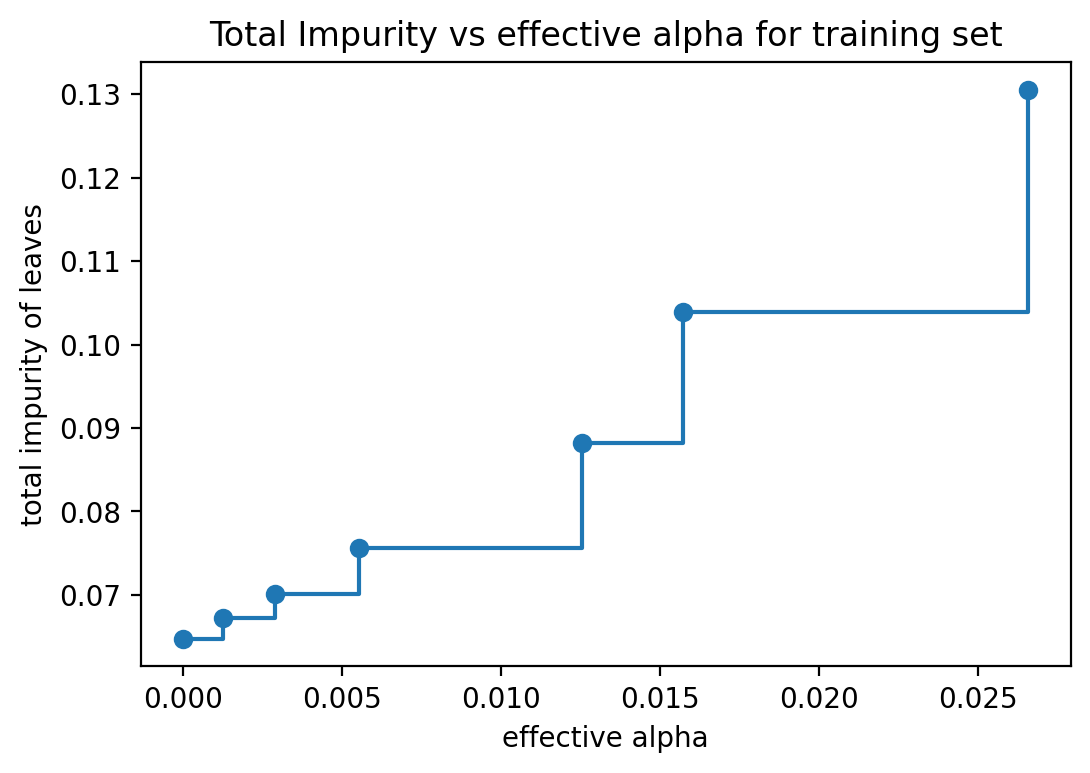

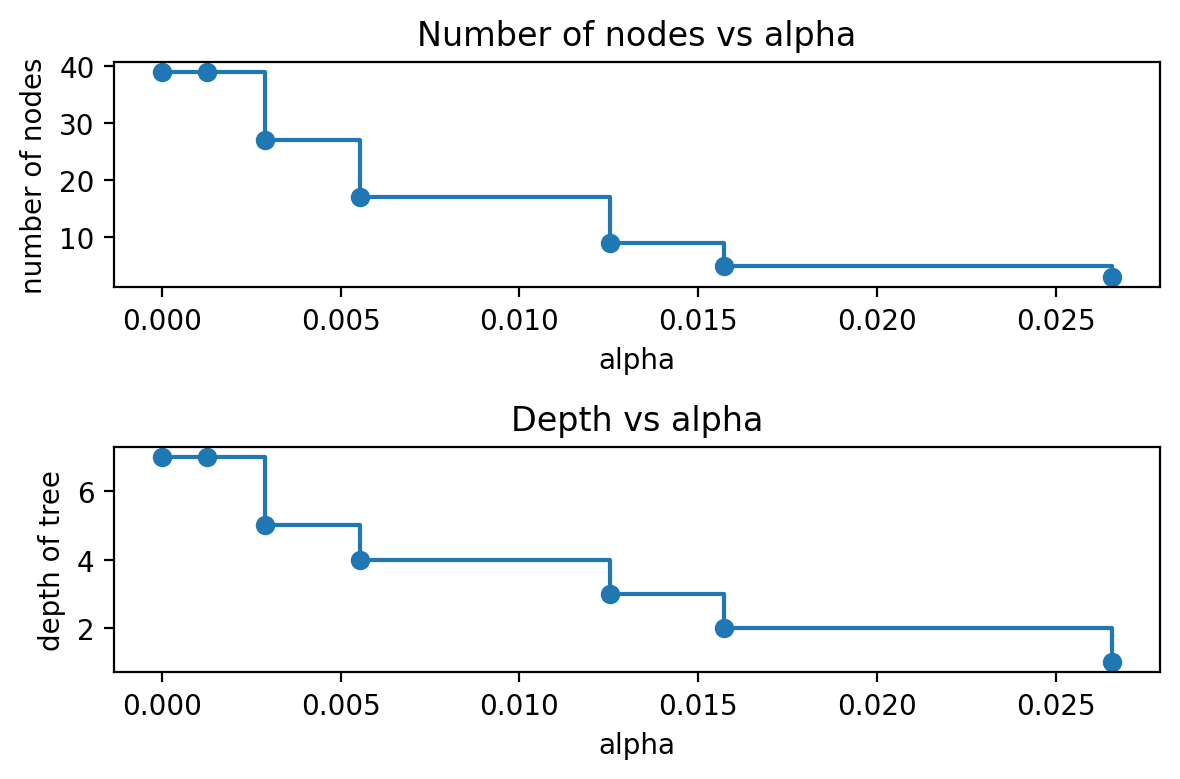

In [863]:
#more graphs for more visualisation
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

<b>3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. </b><br /><br />

<b>Select     the five     most     important     features     from     the     decision     tree     attribute “clf.feature_importances_”. Make a figure with 4x4 subplots, where each rowand columnis one of the featuresand the subplots are the 2Ddisplaysusing the corresponding features.</b><br />


We need to make graph between all the five features so there must be 25 graph but we will remove diagonal as they will be between same features and we remove all the above diagonal also as they are just transpose of lower diagonl so we are just printing 10 lower diagonal in 4X4 grid

{'mean radius': 0.0, 'mean texture': 0.0, 'mean perimeter': 0.0, 'mean area': 0.0, 'mean smoothness': 0.0, 'mean compactness': 0.0, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.0, 'mean fractal dimension': 0.0, 'radius error': 0.0, 'texture error': 0.0, 'perimeter error': 0.0, 'area error': 0.0, 'smoothness error': 0.0, 'compactness error': 0.0, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.0, 'fractal dimension error': 0.0, 'worst radius': 0.0, 'worst texture': 0.0, 'worst perimeter': 0.0, 'worst area': 0.0, 'worst smoothness': 0.0, 'worst compactness': 0.0, 'worst concavity': 0.0, 'worst concave points': 0.0, 'worst symmetry': 0.0, 'worst fractal dimension': 0.0}


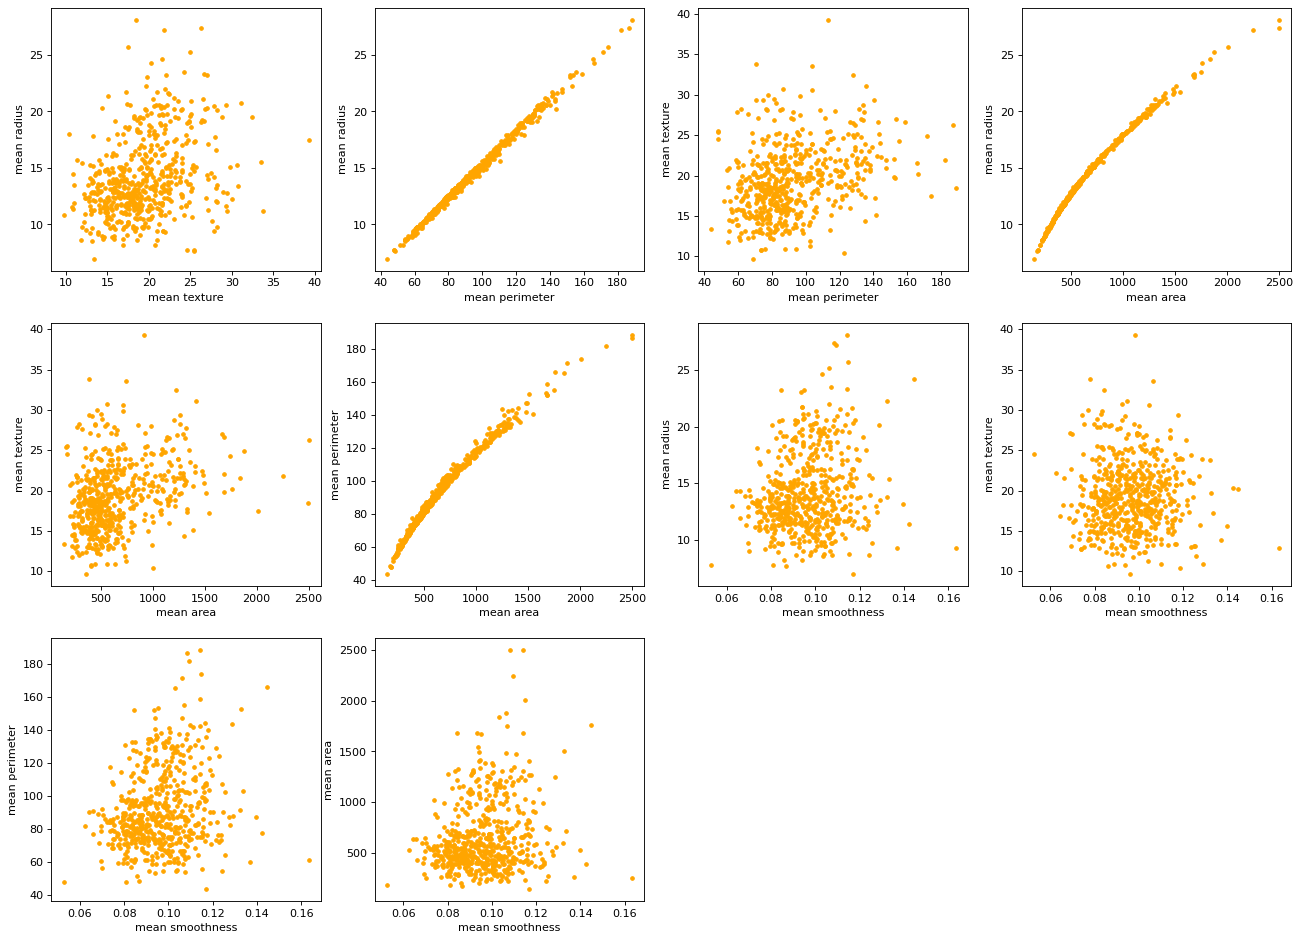

In [864]:
print(dict(zip(X.columns, clf.feature_importances_)))
d = dict(zip(X.columns, clf.feature_importances_))
imp_tree = pd.DataFrame(d.items()) 
#selecting top 5 features used in decision tree for plotting 
imp= imp_tree.nlargest(5,[1])
#accessing column names
pl = df[imp[0]]
x_imp = pl.columns
#
fig=plt.figure(figsize=(20,20),dpi=80)
count = 0
#running loop to plot the scatter graph
for i in range(0,5):
    for j in range(0,5):
        if(i>j):
            ax1=fig.add_subplot(4,4,count+1)
            plt.scatter(df[x_imp[i]], df[x_imp[j]],s=10,color='Orange')
            plt.xlabel(x_imp[i])
            plt.ylabel(x_imp[j])
        else:
            count = count-1  
        count = count+1
plt.show()

<b>For the  decision boundary, use codethat samples the  prediction value  in the plane of the respective two features(see example below)at the Analysis Point.This means that all other feature dimensions stay constant atthe valuesof the Analysis Point.Use amargin of 30%of eachfeature value range(max-min)around thedata cloud.Use the contourf()functionlike in  the  example and  its  parameters “levels”and “colors”.It  is highly recommended  to program this display asa functionfor later reuse.</b>

In [865]:
#creating a function  for decision boundary so it can be used in both decision tree and in svc
def visualize_classifier(model, X, y, i,j,cmap,option=0,margin=0.3,ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=20, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xmin,xmax = xlim[0],xlim[1]
    ymin,ymax = ylim[0],ylim[1]
   
    # fit the estimator
    model.fit(X, y)
    #for decision tree classifier
    if(margin==0.3):
        #30% margin
        r1 = xmax-xmin
        r2 = ymax-ymin
        d1 = margin * r1
        d2 = margin * r2
        xx, yy = np.mgrid[xmin-d1:xmax+d1:100j, ymin-d2:ymax+d2:100j]   
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # Create a color plot with the results
        n_classes = len(np.unique(y))
        contours = ax.contourf(xx, yy, Z , alpha=0.25,levels=np.arange(n_classes + 1)-0.5 ,cmap=cmap, clim=(y.min(), y.max()),zorder=1,color = {'b','g'})
    #for svc
    else:
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # Create a color plot with the results
        n_classes = len(np.unique(y))
        contours = ax.contourf(xx, yy, Z, alpha=0.25,levels=[-1,0,1] ,cmap=cmap, clim=(y.min(), y.max()),zorder=1,linewidths=9,extend='both')
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100,color='y');
    ax.set(xlim=xlim, ylim=ylim)
    plt.xlabel(x_imp[i])
    plt.ylabel(x_imp[j])

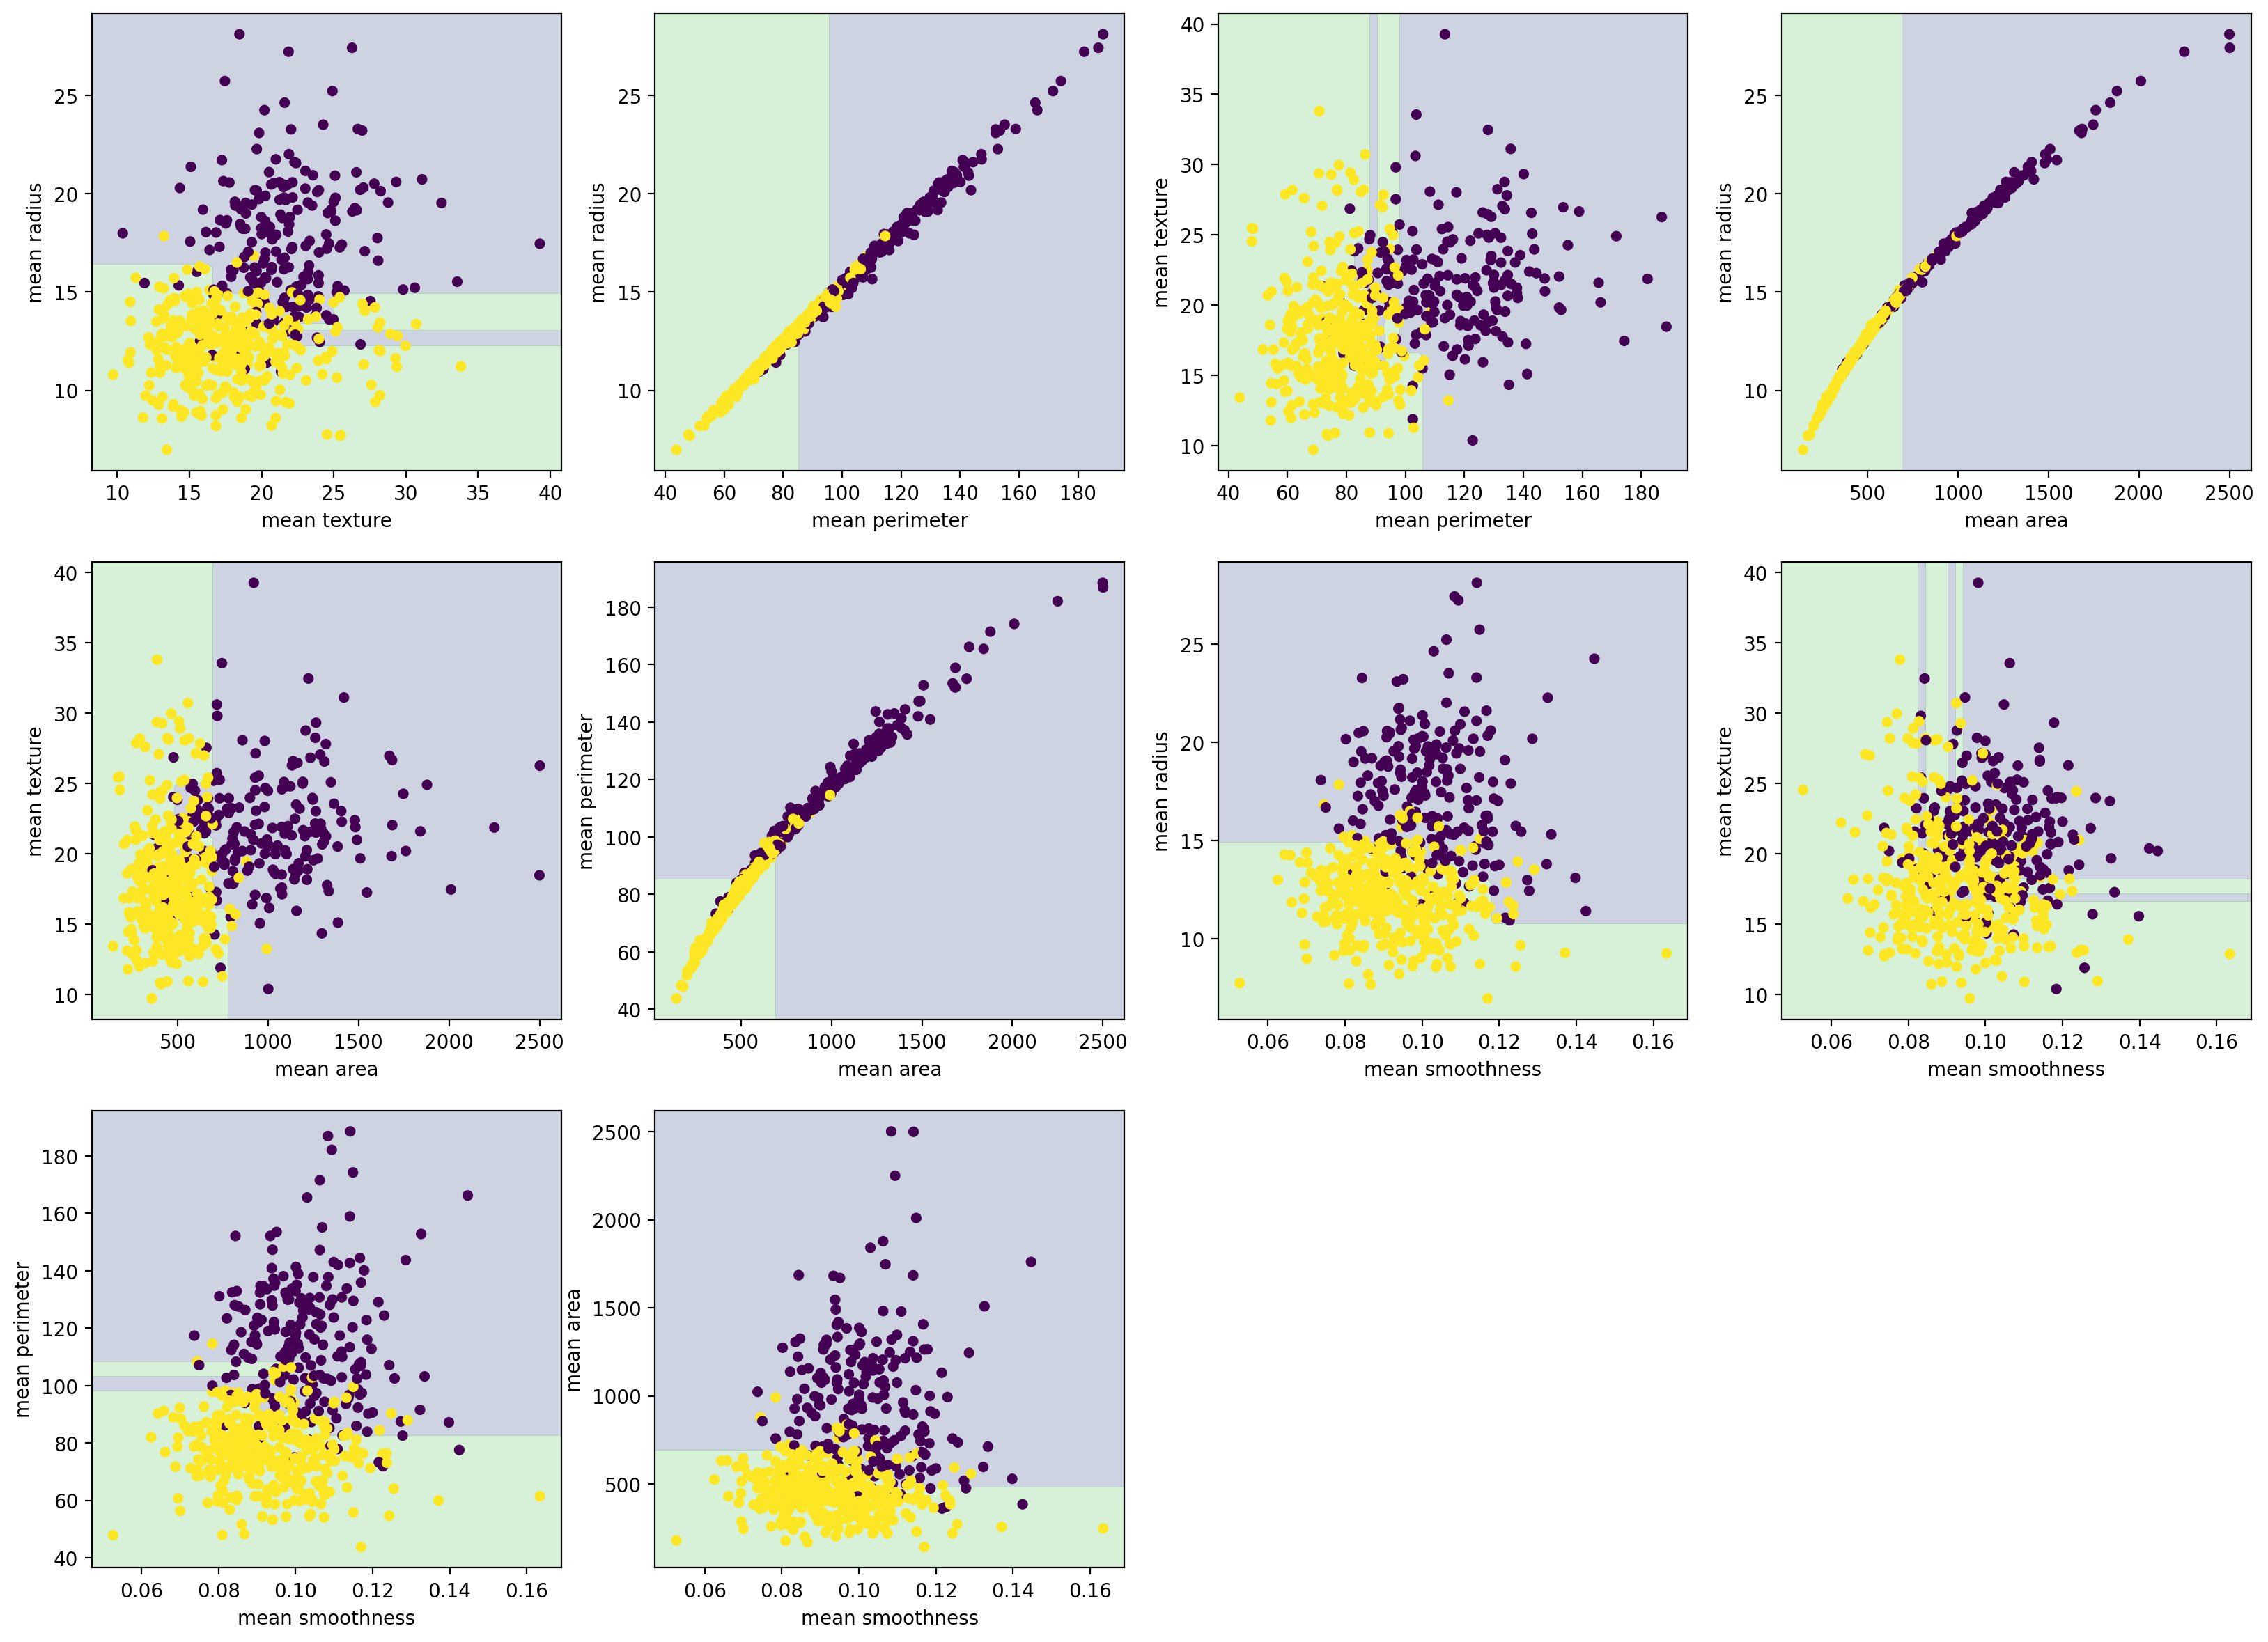

In [866]:
#decision boundary for decision tree classifier
fig=plt.figure(figsize=(20,20))
count = 0
for i in range(0,5):
    for j in range(0,5):
        if(i>j):
            ax=fig.add_subplot(4,4,count+1)
            visualize_classifier(clf24, df[[x_imp[i],x_imp[j]]], df['target'],i,j,None)
            plt.xlabel(x_imp[i])
            plt.ylabel(x_imp[j])
        else:
            count = count-1  
        count = count+1
plt.show()

<b>Plot the Analysis Point with a blue “+” marker in each diagram.</b>

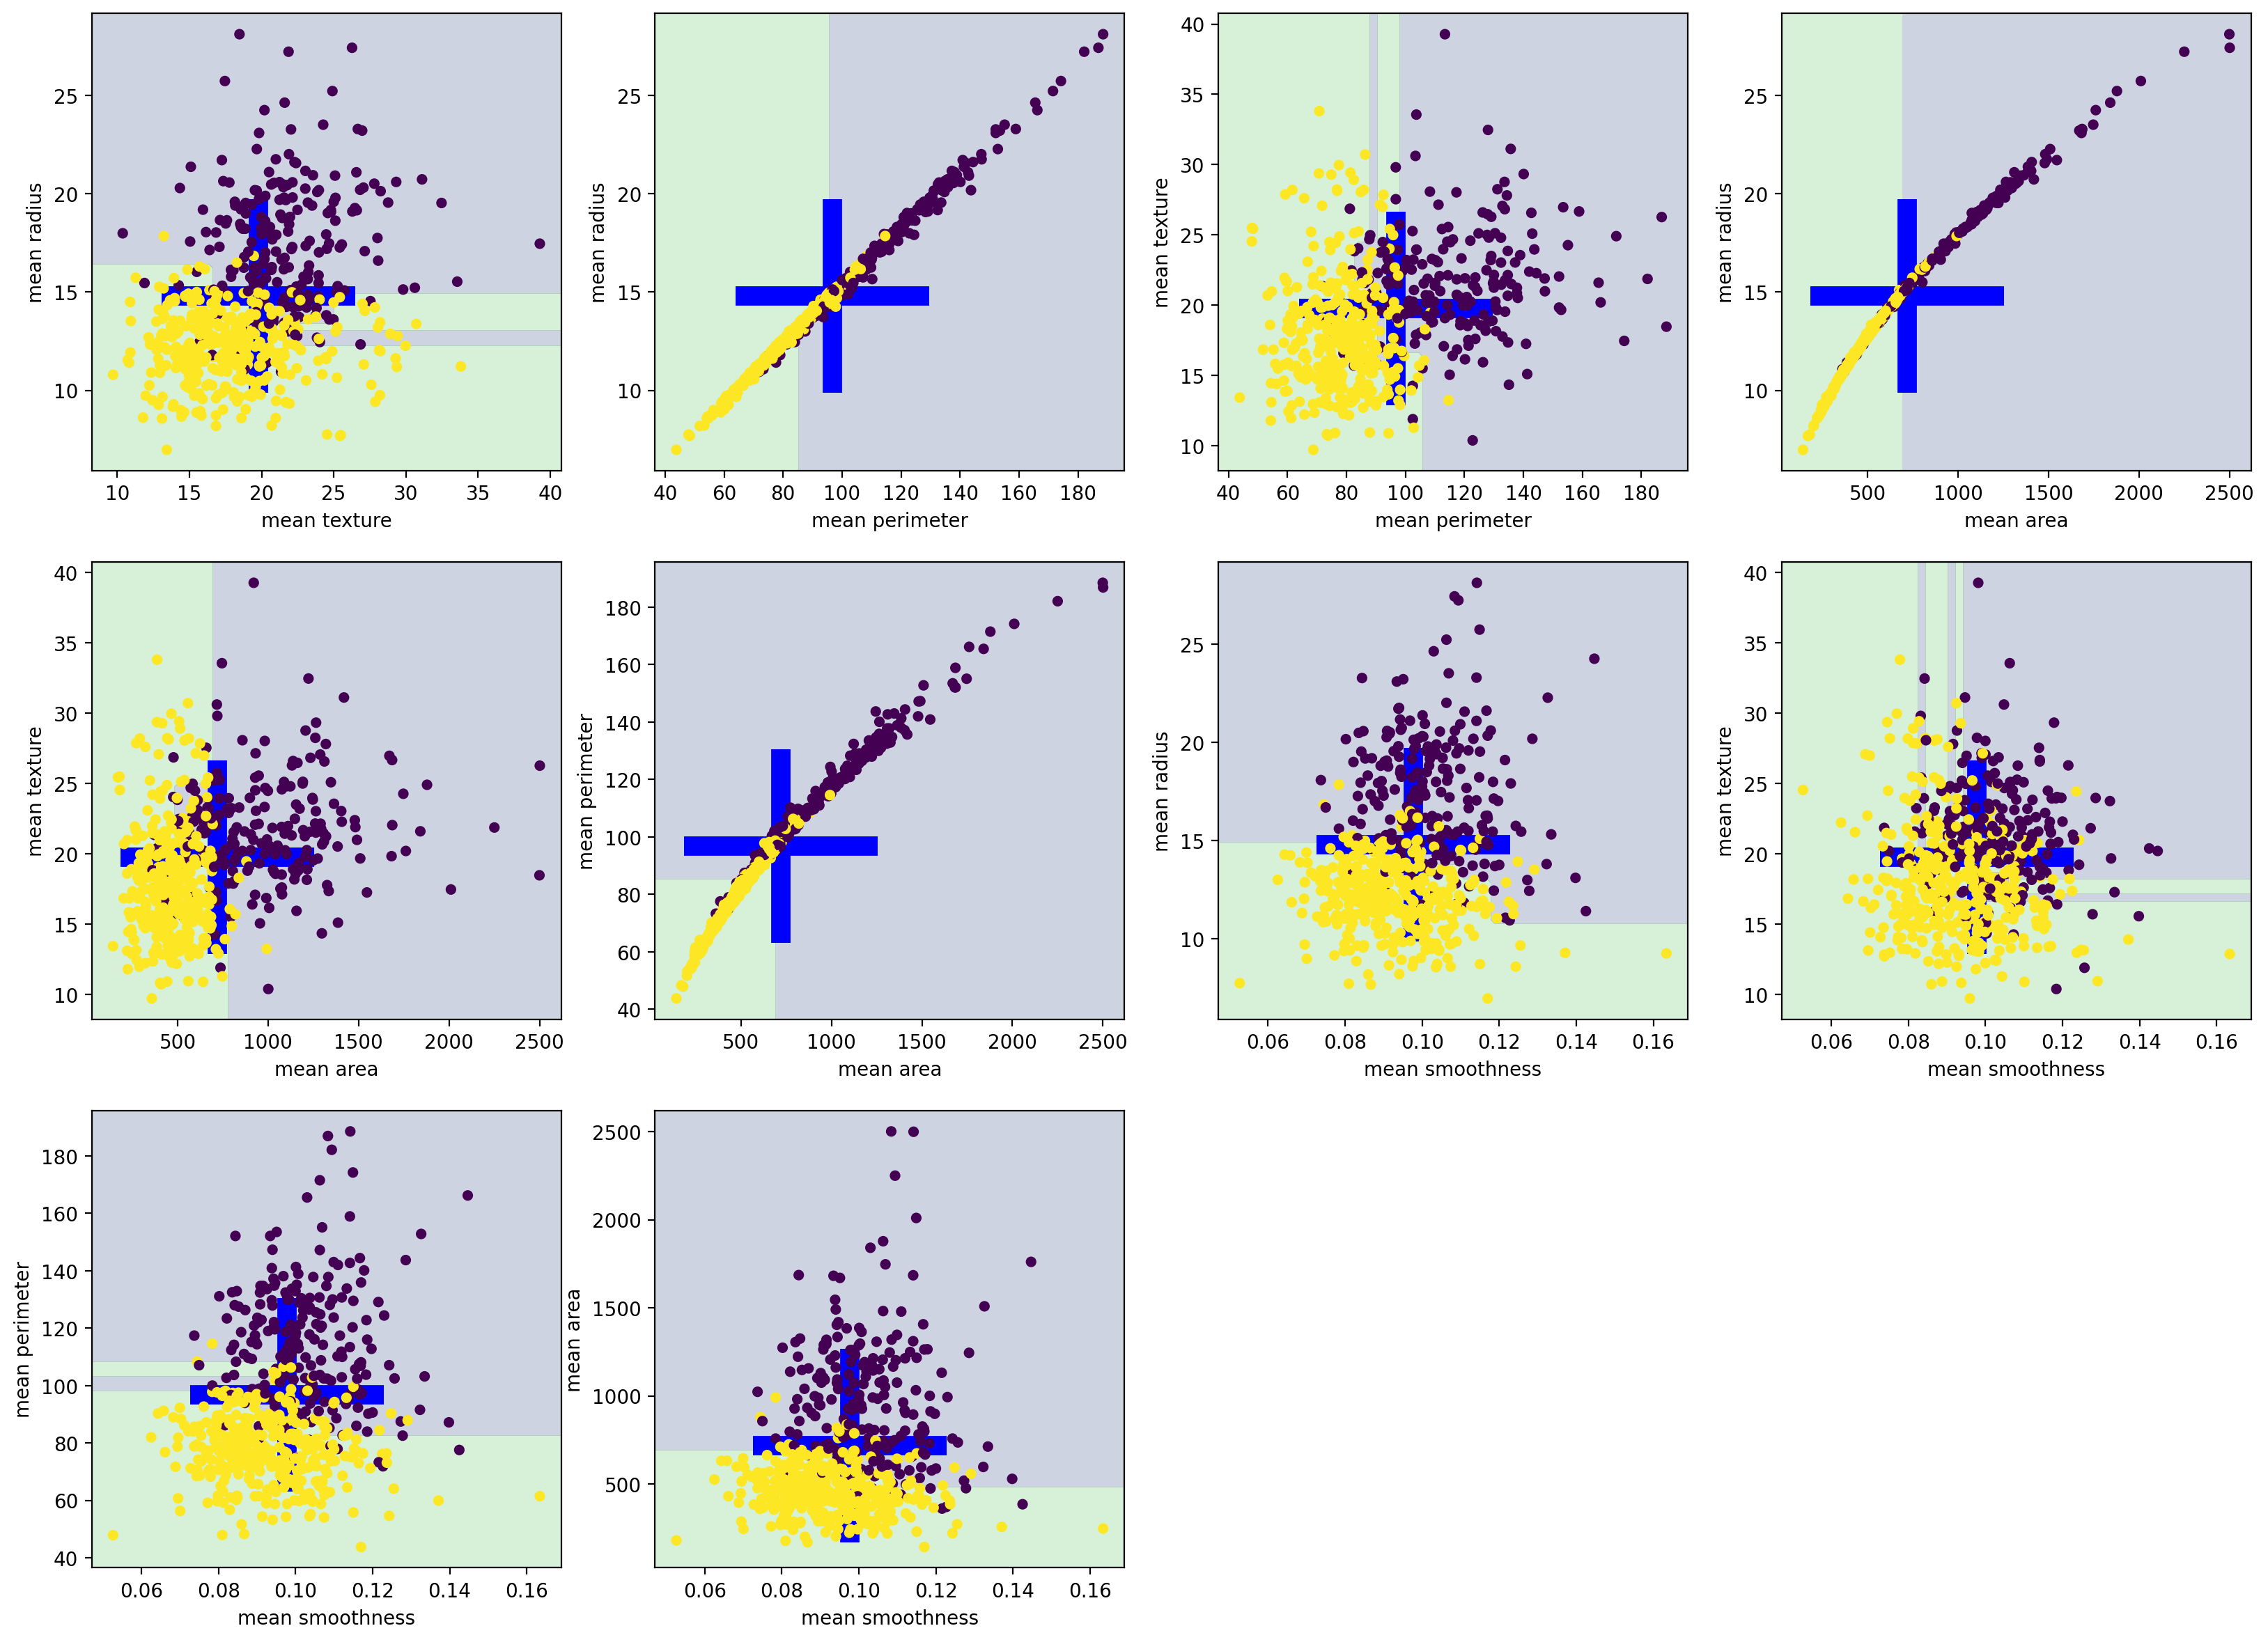

In [867]:
#decision boundary for decision tree classifier
fig=plt.figure(figsize=(20,20))
count = 0
for i in range(0,5):
    for j in range(0,5):
        if(i>j):
            ax=fig.add_subplot(4,4,count+1)
            visualize_classifier(clf24, df[[x_imp[i],x_imp[j]]], df['target'],i,j,None)
            plt.plot(analysis_point[x_imp[i]], analysis_point[x_imp[j]], marker='+',color='blue', linewidth=8, markersize=100, mew=10)
            plt.xlabel(x_imp[i])
            plt.ylabel(x_imp[j])
        else:
            count = count-1  
        count = count+1
plt.show()

<b>3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?</b>

<b>Answer:</b>
Decision Trees divide the input space into axis-parallel rectangles and label each rectangle with one of the K classes
The decision boundary is the set of all points whose y-coordinates are exactly equal to the threshold. One region is all the points above this line and the other is all the points below. 



The best feature/split combination, the data are partitioned into two regions and the splitting process is repeated on each of the two regions (hence the name binary recursive partitioning). This process is continued until a suitable stopping criterion is reached (e.g., a maximum depth is reached or the tree becomes “too complex”).It’s important to note that a single feature can be used multiple times in a tree.If we build a deeper tree, we’ll continue to split on the same feature (x). This is because x is the only feature available to split on so it will continue finding the optimal splits along this feature’s values until a pre-determined stopping criteria is reached. So we can observe the rigid or stair case pattern.


Here, we are just considering two features at a time so we can say that it is more focused or characterised by the node thresholds




In some of the featureonly one class is shown as prediction contour as single feature may dominate if it continues to provide the best split after each successive partition.

<b>4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.</b><br />
    
<b>SVM</b><br />
The Support Vector Machine is a supervised learning algorithm mostly used for classification but it can be used also for regression. The main idea is that based on the labeled data (training data) the algorithm tries to find the optimal hyperplane which can be used to classify new data points. In two dimensions the hyperplane is a simple line.<br />
    
    
<b>C</b><br />
C bounds the sum of the εi’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate. We can think of C as a budget for the amount that the margin can be violated by the n observations. If C= 0 then there is no budget for violations to the margin, and it must be the case that ε1=...=εn= 0, in which simply amounts to the maximal margin hyperplane optimization problem  For C>0 no more than C observations can be on the wrong side of the hyperplane, because if an observationis on the wrong side of the hyperplane then εi>1, and it requires that ∑ni=1εi≤C. As the budget C increases, we become more tolerant of violations to the margin, and so the margin will widen. Conversely, as C decreases, we become less tolerant of violations to the margin and so the margin narrows. <br />
In practice,C is treated as a tuning parameter that is generally chosen via cross-validation. As with the tuning parameters ,C controls the bias-variance trade-off of the statistical learning technique. When C is small, we seek narrow margins that are rarely violated; this amounts to a classifier that is highly fit to the data, which may have low bias but high variance. On the other hand, when C is larger,the margin is wider and we allow more violations to it; this amounts to fitting the data less hard and obtaining a classifier that is potentially more biased but may have lower variance. So we habe given different values of C.
<br />
<b>Gamma</b><br />
The gamma parameter defines how far the influence of a single training example reaches. This means that high Gamma will consider only points close to the plausible hyperplane and low Gamma will consider points at greater distance.
 ROC curves for SVMs using a radial kernel, with various values of γ.As γ increases and the fit becomes more non-linear, the ROC curves improve.
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.
Default value is scaled.
<br />
<b>Tolerance</b><br />
Tolerance for stopping criterion. using the dfault value e^-3
<br />
<b>Class Weight</b><br />
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Not given so default is considered.<br />
<b>Maximum Iteration</b><br />
Hard limit on iterations within solver, or -1 for no limit. So default value 1 is used.


Best Parameters for default fit:{'kernel': 'rbf', 'gamma': 0.001, 'C': 1} 




Best Score for default fit: 0.9133287764866711 




Best Parameters when changing all parameters:{'kernel': 'rbf', 'gamma': 0.001, 'class_weight': None, 'C': 1} 




Best Score when changing all parameters: 0.9133287764866711 




Best Estimators for default fit:SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 




Best Estimators when changing all parameters:SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 




Confusion matrix for default parameters: [[ 65   2]
 [ 13 108]] 




Confusion matrix while changing parameters

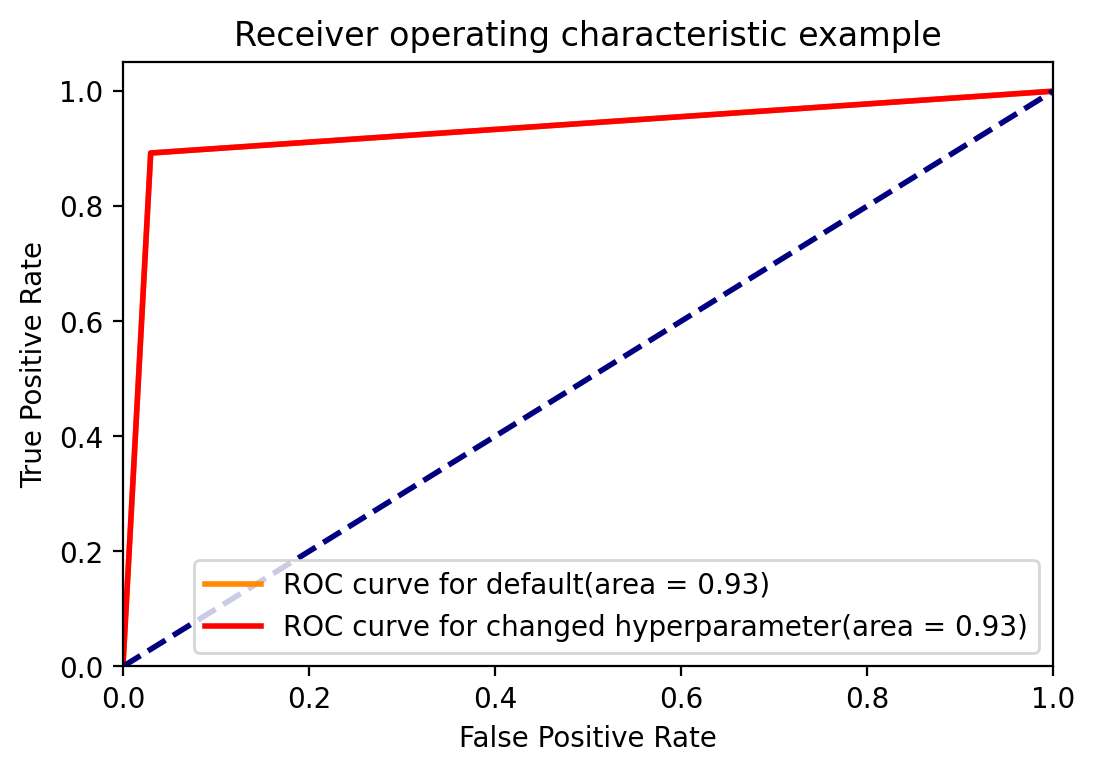

For Default parameter list:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90        67
           1       0.98      0.89      0.94       121

    accuracy                           0.92       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.93      0.92      0.92       188
 




Changing all the parameters:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90        67
           1       0.98      0.89      0.94       121

    accuracy                           0.92       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.93      0.92      0.92       188


Default Heat map



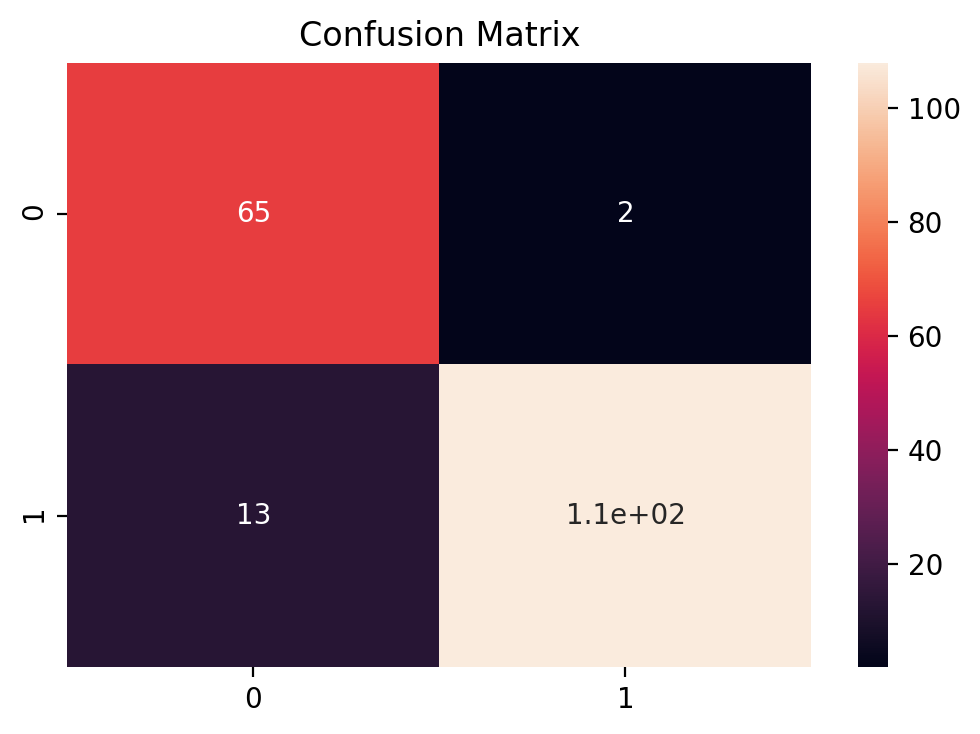


When changing all the parameters



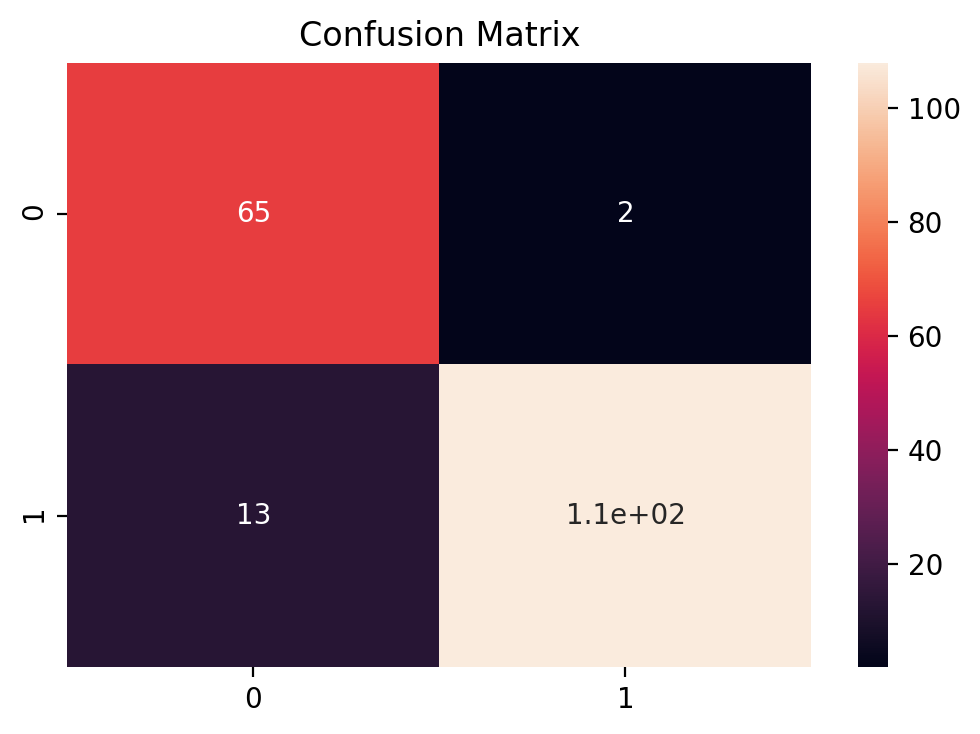

In [868]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
param_grid1 = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'],
               'class_weight':['balanced',None]
             }
grid = RandomizedSearchCV(SVC(),param_grid,refit=True,cv=5)
grid1 = RandomizedSearchCV(SVC(),param_grid1,refit=True,cv=5)
warnings.simplefilter("ignore")
#scaling the data 
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train
#fitting the data
grid.fit(X_train,y_train)
grid1.fit(X_train,y_train)
print("Best Parameters for default fit:{}".format(grid.best_params_),"\n\n\n\n")
print("Best Score for default fit: {}".format(grid.best_score_),"\n\n\n\n")
print("Best Parameters when changing all parameters:{}".format(grid1.best_params_),"\n\n\n\n")
print("Best Score when changing all parameters: {}".format(grid1.best_score_),"\n\n\n\n")
print("Best Estimators for default fit:{}".format(grid.best_estimator_),"\n\n\n\n")
print("Best Estimators when changing all parameters:{}".format(grid1.best_estimator_),"\n\n\n\n")
y_pred12 = grid.predict(X_test)
y_pred21 = grid1.predict(X_test)
cm = confusion_matrix(y_test,y_pred12)
cm1 = confusion_matrix(y_test,y_pred21)
print("Confusion matrix for default parameters:",cm,"\n\n\n\n")
print("Confusion matrix while changing parameters:", cm1,"\n\n\n\n")
## can be seen that overfitting the data as training data has hogh score in when all the parameters are changing
##but not in case of test data so overfitting
fpr, tpr, _ = roc_curve(y_test, y_pred12)
fpr1, tpr1, _ = roc_curve(y_test, y_pred21)

roc_auc= auc(fpr, tpr)
roc_auc1= auc(fpr1, tpr1)

plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve for default(area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='red',lw=2, label='ROC curve for changed hyperparameter(area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("For Default parameter list:\n",classification_report(y_test, y_pred12),"\n\n\n\n")
print("Changing all the parameters:\n",classification_report(y_test, y_pred21))
print("\nDefault Heat map\n")
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()
print("\nWhen changing all the parameters\n")
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

<b>Observation</b>
We are getting almost the same result when changing all the parameters or keeping it default

<b>4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?</b>

In [869]:
#pipeline
svc = SVC(kernel='rbf')
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc),('svc', svc)])
print(pipe)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


<b>Answer:</b><br />
<b>Do the data need to be scaled for support vector classification?</b><br />
SVM tries to maximize the distance between the separating plane and the support vectors. If one feature (i.e. one dimension in this space) has very large values, it will dominate the other features when calculating the distance. If you rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric. The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical diculties during the calculation. Because kernel values usually depend on the inner products of feature vectors, e.g. the linear kernel and the polynomial ker- nel, large attribute values might cause numerical problems. 
<br />
<b> Are the different class sizes a problem, and if so what are you doing about it?</b><br />
For any value of C The hyperplane is far from the data points, we can say that this model cannot classify the imbalanced dataset. So here in this case the dataset is not much imbalanced however we are using class weight as balanced to solve this issue with cross validation. <br />
In this case of sparse data like that SVM will work well.
you should not use accuracy to measure the performance of the algorithm.
Instead you should calculate the precision, recall and F-Score of the algorithm.

<b>4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?</b>

In [870]:
#grid search
param_grid = {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [1, 0.1, 0.01, 0.001], 'svc__kernel': ['rbf']}
grid = GridSearchCV(pipe,param_grid,cv=5)
#fitting
grid.fit(X_train,y_train)
#predicting
print("Best Parameters :{}".format(grid.best_params_),"\n\n\n\n")
print("Best Score : {}".format(grid.best_score_),"\n\n\n\n")
print("Best Estimators :{}".format(grid.best_estimator_),"\n\n\n\n")
warnings.simplefilter("ignore")
grid.fit(X_train,y_train)
print("Best Parameters:{}".format(grid.best_params_),"\n\n\n\n")
print("Best Score : {}".format(grid.best_score_),"\n\n\n\n")
print("Best Estimators :{}".format(grid.best_estimator_),"\n\n\n\n")
y_predGG = grid.predict(X_test)
cm = confusion_matrix(y_test,y_predGG)
print("Confusion matrix for :",cm,"\n\n\n\n")



Best Parameters :{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'} 




Best Score : 0.9737183868762816 




Best Estimators :Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False) 




Best Parameters:{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'} 




Best Score : 0.9737183868762816 




Best Estimators :Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100, break_ties=False, cache_size=200, class_weig

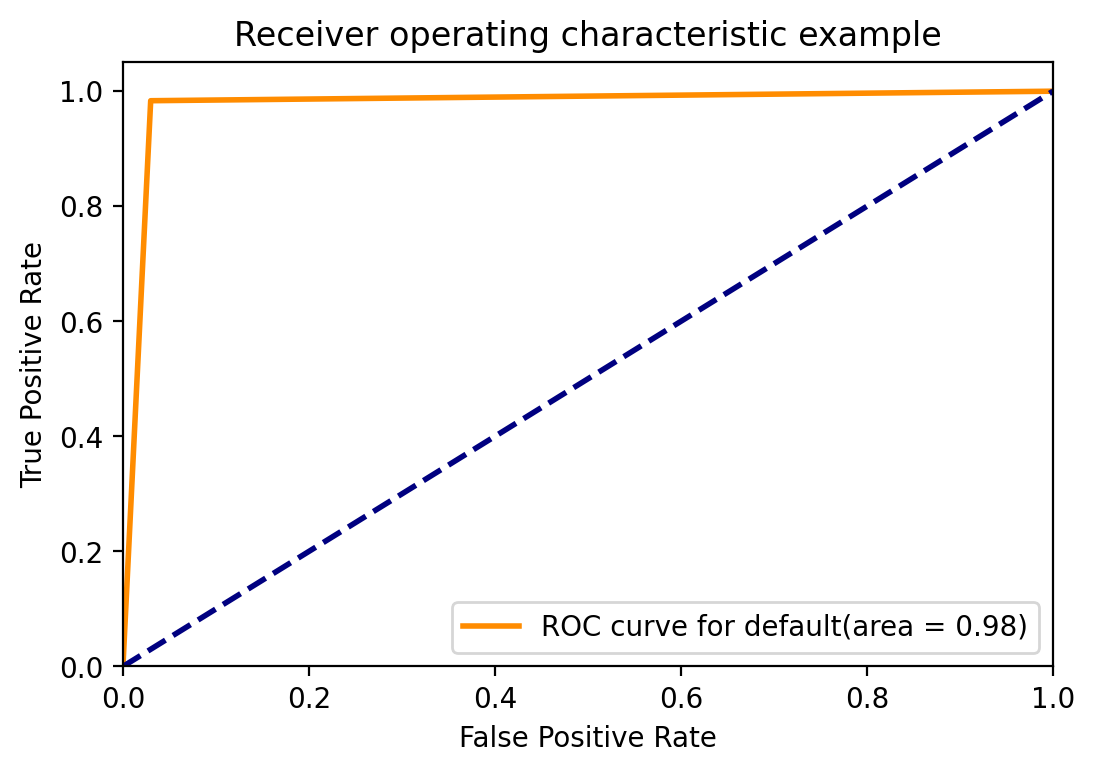

For Default parameter list:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188
 






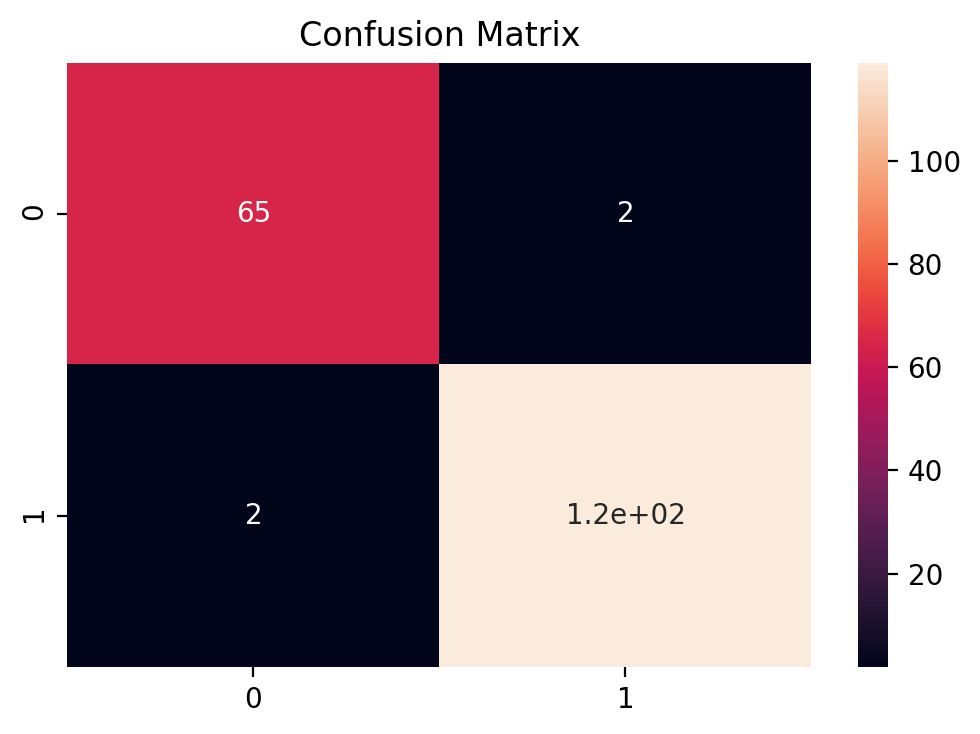

In [871]:
#some metrics
fpr, tpr, _ = roc_curve(y_test, y_predGG)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve for default(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("For Default parameter list:\n",classification_report(y_test, y_predGG),"\n\n\n\n")
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

<b>Answer:</b> <br />
We get the best estimator as C = 100, gamma = 0.001 and other values are kept at default as explained above. Obviously we are getting high value of C as it makes the margin soft so more budget so more acceptable to fit the model when gamma =0.01 as it is a kernel coefficient. (working is explained above)

<b>5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?</b>


Confusion matrix:
 [[ 65   2]
 [  2 119]]


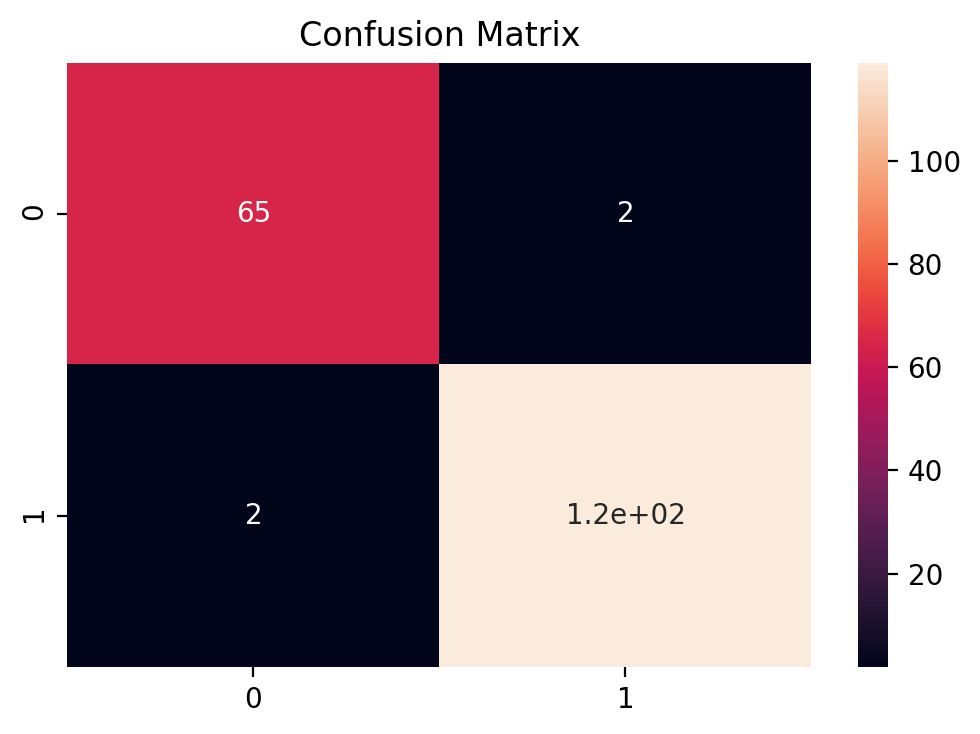

In [872]:
#Confusion Matrix
cm_gg = confusion_matrix(y_test,y_predGG)
print("\nConfusion matrix:\n",cm_gg)
#Heat map of confusion matrix
sns.heatmap(cm_gg, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [873]:
#Classification Report for all the metrics
print(classification_report(y_test, y_predGG))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188




FPR: [0.         0.02985075 1.        ]

TPR: [0.         0.98347107 1.        ]


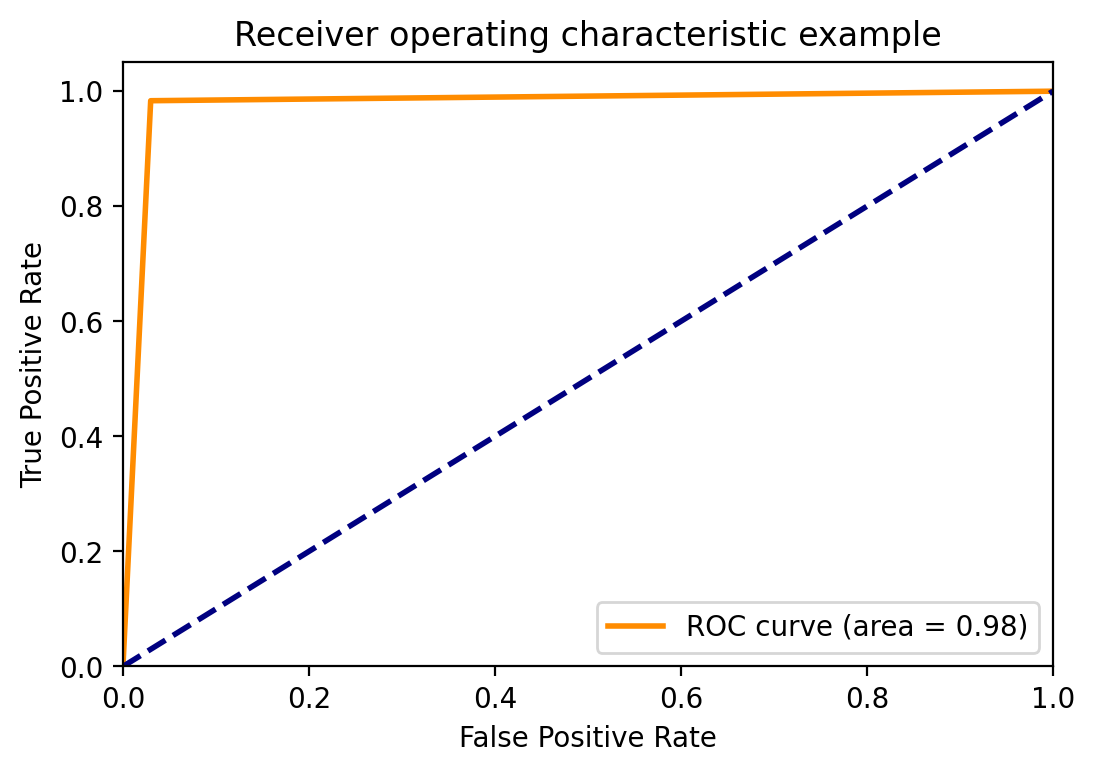

In [874]:
#Calculating fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_predGG)
print("\nFPR:",fpr)
print("\nTPR:",tpr)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [875]:
#more metrics
from sklearn.metrics import average_precision_score,recall_score,precision_score,precision_recall_curve
b_r=recall_score(y_test, y_predGG, average='binary')
b_p = precision_score(y_test, y_predGG, average='binary')
precision, recall, _ = precision_recall_curve(y_test,y_predGG)
average_precision = average_precision_score(y_test, y_predGG)
print('\nPrecision Array:',precision)
print('\nRecall Array:',recall)
print('\nPrecision:',b_p)
print('\nRecall:',b_r)
print('\nAverage precision-recall score: {0:0.2f}'.format(average_precision))


Precision Array: [0.64361702 0.98347107 1.        ]

Recall Array: [1.         0.98347107 0.        ]

Precision: 0.9834710743801653

Recall: 0.9834710743801653

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

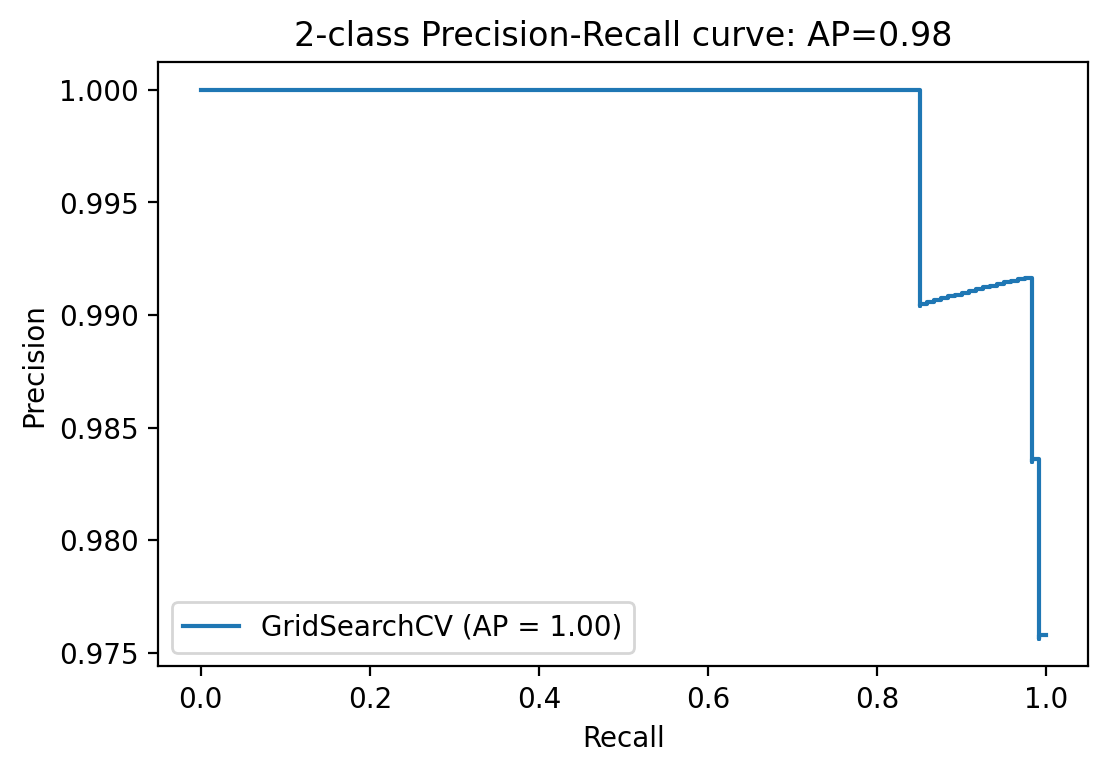

In [876]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(grid, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

<b>Answer:</b>
According to confusion metrics Diagonal elements are good and Off-Diagonal elements show errors.
So off diagonal elements are False Positive and False Negative so in this case 2 + 2 = 4 cases are interpreted incorrectly. So chance of of failing to detect a sample with cancer is the odd of failure which is given by Probab of failure divide by probab of success.

In [877]:
#Caculating the chance of failure
chance_fail = (cm_gg[0,1] + cm_gg[1,0])/(cm_gg[0,0] + cm_gg[1,1])
print("\nChance of failing:",chance_fail)


Chance of failing: 0.021739130434782608


<b>5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. </b>

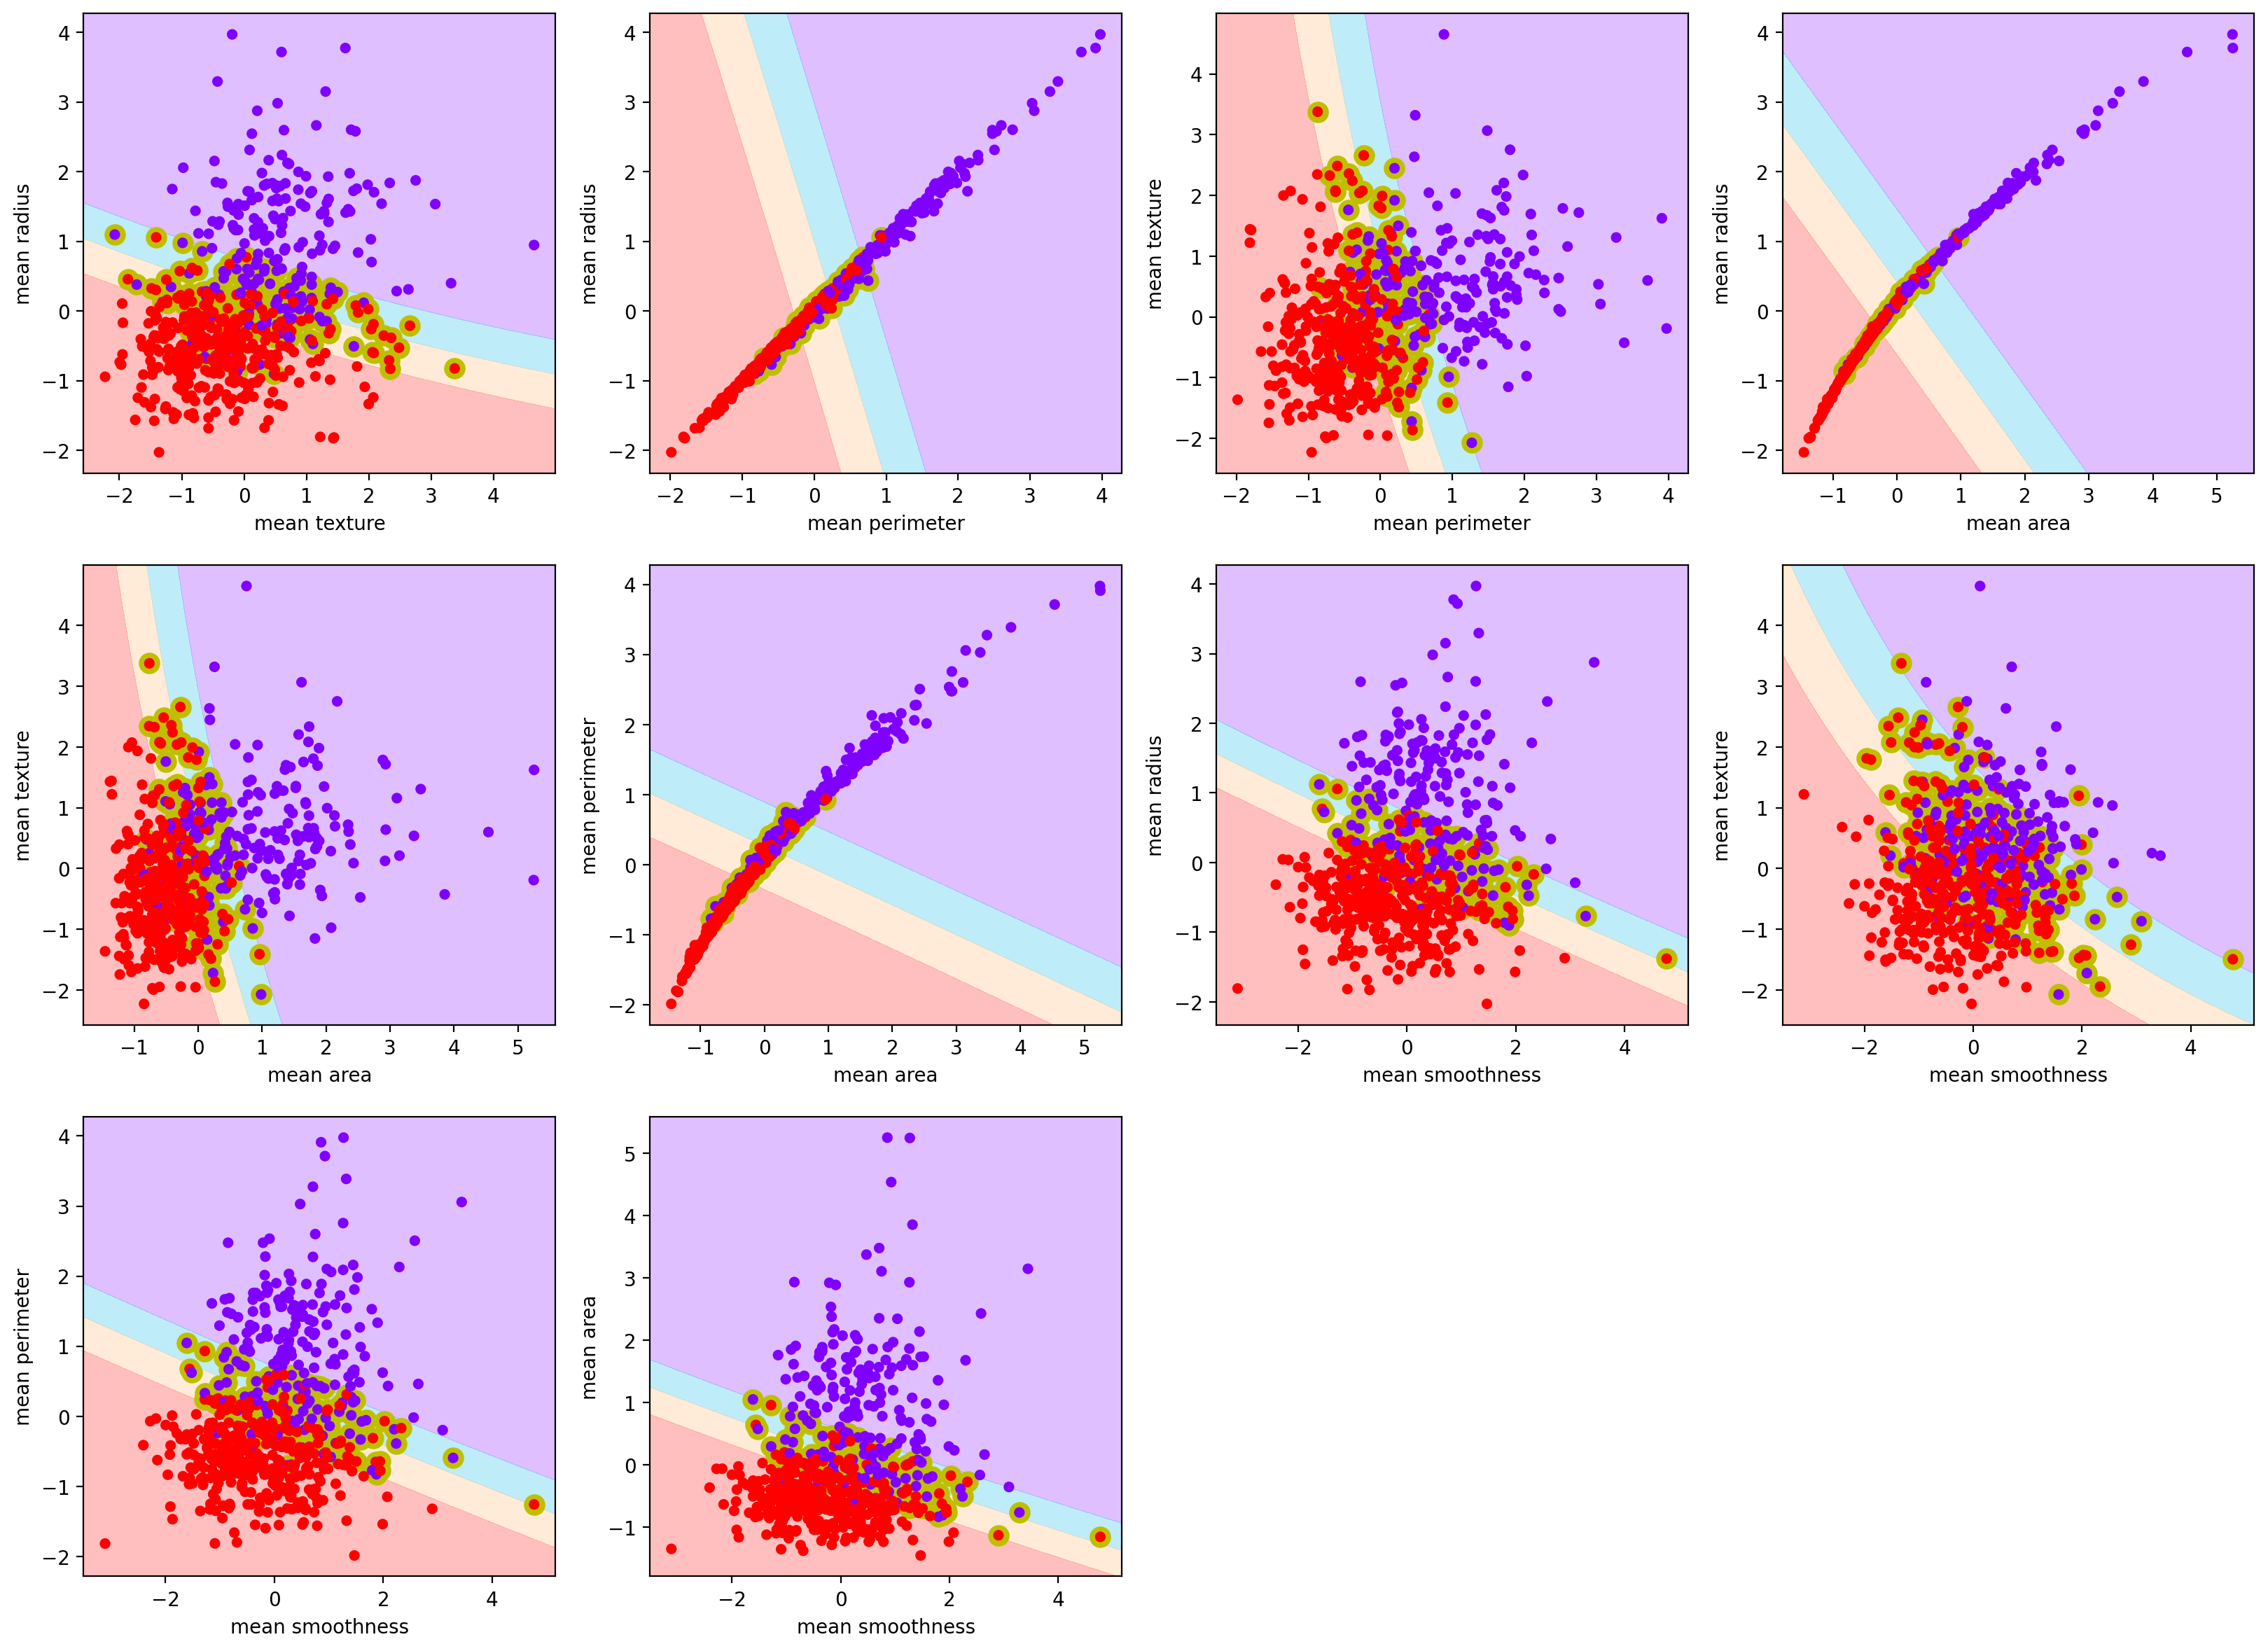

In [878]:
#decision boundary for same parameters as used in decision tree 
#rainbow cmap is used
#margin 0 is used to differentiate it with decision tree
#support vectors are marked with greenish color
from sklearn import preprocessing
fig=plt.figure(figsize=(20,20))
count = 0
model = SVC(C=100,gamma=0.001,kernel='rbf')
sc = StandardScaler()
for i in range(0,5):
    for j in range(0,5):
        if(i>j):
            ax=fig.add_subplot(4,4,count+1)
            X_C = pd.DataFrame(preprocessing.scale(df[[x_imp[i],x_imp[j]]]))
            visualize_classifier(model, X_C, df['target'],i,j, cmap=plt.cm.rainbow,margin=0)
            plt.xlabel(x_imp[i])
            plt.ylabel(x_imp[j])
        else:
            count = count-1  
        count = count+1
plt.show()

<b>Answer:</b><br />
We can see the the classification boundary between all the features with support vectors are marked with greenish color and we can easily figure that radial kernel is used.

<b>5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?</b>

<b>Answer:</b><br />

In SVM, To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.<br />
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build  SVM.<br />
<img src="https://i.ibb.co/SVHfBp0/svm.png" alt="svm" border="0"></a>
<br />

The way maximal margin classifier looks like is that it has one plane that is cutting through the p-dimensional space and dividing it into two pieces, and then it has two lines, each on one and other side of that plane. Those lines are called margins, and the observations touching those two lines are called vectors. They are defining the length of the margin, farther those points are, farther away those two lines are from the middle hyperplane. Those touching points are called vectors because they are vectors in p-dimensional space.
This classifier simply depends upon those vectors and not on all other observations available in the training set. Meaning, if you move vectors, the classifier would change its margin, but if you move all other observations the margin wouldn’t change.
<img src="https://i.ibb.co/kXxddRt/sv.png" alt="sv" border="0">
<br />
So, having the previous property of defining the maximal margin such that observation falls in the correct side of margin, we can take into account another property of wrongly classifying a few observations in order to better generalize the model and in order to deal with the outliers.

Support vector classifier = soft margin classifier<br />

we need some kind of standardized computation method that can convert our feature space into higher dimension..The kernel trick is an effective computational approach for enlarging the feature space. The kernel trick uses inner product of two vectors. <br />

<b>Purpose:</b><br />
A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the distance margin between the two classes.
The extreme points in the data sets that define the hyperplane are the support vectors. We can observe these points there.
<b>In the diagram we can observe the support vector when there is change in hyperplane with some wrongly guessed classifier as it's due to parameter C which is the summation of all the slack variable(wrongly side of the plane). </b>They are helping in widening the margin by selecting the appropriate hyperplane. (we can see the margin acroos the support vectors in the above diagrams).We can exactly see the margin and classification line.<br />
<br /><b>Mathematical Answer:</b><br />
The support vectors are those points for which the Lagrange multiplier is not zero (There is more than just b in a Support Vector Machine). Largrange Multiplier is used for minimization.<br />
<img src="https://i.ibb.co/TvzfkqT/mm.png" alt="mm" border="0">

<b>6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?</b>

<b>Answer:</b><br />
<b>Classifier Structure</b><br />
In Decision Tree nodes are selected on the basis of Gini Index and parameters such as Gini Index and max depth etc are used in classification. If it's of one class then left side if aother class then right side. Based on this the tree is made and classification is done. No scaling is required in this porcess. he basic idea behind any decision tree algorithm is as follows:<br />
Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.
Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.


In SVM classification is done on the basis of support vectors. In this support vetors are selected and by maximizing the margin using these support vectors hyperplane is divided (soft margin concept). But before doing so scaling is done on the dataset and scaling is required as value can be spreaded so it will be hard to plot margin without scaling. In this hyperparameter search is performed on the value of C and Gamma. In this gamma kernel is used. For SVM , a High value of Gamma leads to more accuracy but biased results and vice-versa. Similarly, a large value of Cost parameter (C) indicates poor accuracy but low bias and vice-versa. Applying Soft Margin, SVM tolerates a few dots to get misclassified and tries to balance the trade-off between finding a line that maximizes the margin and minimizes the misclassification.<br />

<b>Decision Boundary</b><br />
Decision boundary of a decision tree is determined by overlapping orthogonal half-planes (representing the result of each subsequent decision). So it's based on a stair-case pattern. In some cases due to dominations plotting of decision tree is not possible and we have considered the margin of 30% in this case.


Shape of the SVM decision boundary depends on the kernel (similarity function) used. Here RBF is used and we have used gamma hyperparameter search. Radial Basis Function kernel as a transformer/processor to generate new features by measuring the distance between all other dots to a specific dot/dots — centers. the higher the gamma, the more influence the feature data points will have on the decision boundary, thereby the more wiggling the boundary will be.


<b>Differences and Similarities</b><br />
Decision Tree methods are considered non-parametric, making no assumption on the distribution of data and the structure of the true model. They require less data cleaning and are not influenced by outliers and multicollinearity to some fair extent but in SVM preprocessing steps like scaling is required as they can be influenced by outliers and other things.The biggest difference between the two algorithms is that SVM uses the kernel trick to turn a linearly nonseparable problem into a linearly separable one, while decision trees split the input space into hyper-rectangles according to the target.<br />
SVM is based on support vectors only, similarly Decision Tree also considering top features while classifying using Gini Index. In both the classifiers the size imbalance matters and needs to handle it.

<b>Extrapolation</b><br />
Classical Decision Trees cannot predict values outside the historically observed range. They will not extrapolate.ll tree algorithms are robust to outliers. Tree algorithms split the data points on the basis of same value and so value of outlier won't affect that much to the split.
In SVM, extrapolate have the capability to make your model poor. The margin will shrink and the decision boundary will be sub optimal resulting in poor classification. In the presence of extrapolation you need to use a more general version of Support Vector Machine that is with soft margins. So it will handle the situations. (we ave used this concept only).

<b>6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?</b>

<b>Answer:</b><br />
<b> Representation</b><br />
<img src="https://i.ibb.co/yfvPy4z/1-9h-PX9p-AO3jq-Lrzt0-IE3-Jz-A.png" alt="1-9h-PX9p-AO3jq-Lrzt0-IE3-Jz-A" border="0">
<b>Sources of bias</b><br />
In Decision Tree it can be seen that it is the best fit approach so this approach is low biased and high varaiance. But in this approach the decision is taken on the basis of top 7 impratant features only so these are the sources of bias.

In SVM margin is based on the support vectors only, we are not considering the other vectors all the boundary is based on these vectors only and changing these values can make a huge difference in separating the boundary so they are the source of bias in this.

<b>For Decision Tree:</b><br />
If the number of levels is too high i.e a complicated decision tree, the model tends to overfit.
Intuitively, it can be understood in this way. When there are too many decision nodes to go through before arriving at the result i.e number of nodes to traverse before reaching the leaf nodes is high, the conditions that you are checking against becomes multiplicative. That is, the computation becomes (condition 1)&&(condition 2)&&(condition 3)&&(condition 4)&&(condition5).

Only if all the conditions are satisfied, a decision is reached. As you can see, this will work very well for the training set as you are continuously narrowing down on the data. The tree becomes highly tuned to the data present in the training set.

But when a new data point is fed, even if one of the parameters deviates slightly, the condition will not be met and it will take the wrong branch. We can see the little bit of overfitting in the data<br />
<b>For SVM:</b><br />
<img src="https://i.ibb.co/Q8by4tc/var.png" alt="var" border="0">
Based on this table and our Hyperparameter search we are getting high value of C and very low value of gamma. So, it's a case of high variance and low bias which is the case that we are getting results that are more focused in terms that we are trying to fit a curve through every single observation. It happens when our model has large number of parameters then it’s going to have high variance and low bias. So it is showing the overfitting of the data.<br />
<b>Based on Metrics:</b><br />
In decision tree we are getting high score on training dataset(approx 0.92) as compared to testing data set(approx 0.89) which is the case of overfitting of thhe data

In SVM we are getting approx the similar score in both the training data and testing data so there's a very little overfittng.(not much). It could be possible due to large number of parameters as this dataset is also small.

<b>6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?</b>
<img src="https://i.ibb.co/S5WM16J/table.png" alt="table" border="0">

<b>Answer:</b><br />
Features used in Decision tree:
<ol>
<li>mean concave points</li>
<li>worst perimeter</li>
<li>worst radius</li>
<li>worst texture</li>
<li>worst area</li>
<li>area error</li>
<li>worst concavity</li>
</ol>

Comparing the number of features in the above table and in decision tree we can conclude that highest accuracy is coming in the above table when 4 fetaures are considered and in the decision tree top 7 features are considered while classifiying. 

When number of features are 4 and number of planes are two then we are getting highest accuracy of 86.3 which contains the set of fetaures as shown in the table. Out of these 4 features 2 features are also used in decision trees that is worst area and worst concativity.


In the above table selection of features are done the basis of number of features and hyperplane and checking accuracy and we can see the accuracy at every point and select the approach we needed but in the decision tree feature selection is done on the baisis of gini index as explained in above parts.


We can see the accuracy in the table with number of features and number of plane. In decision tree by using these features set getting the accuracy of 0.95, this can be the reason of overfitting also as we are using more features as mentioned in the table for decision tree and using different hyperparameters that can make the difference between two. If we see for svm classifier we are getting accuracy of 0.97 this is also due to the use of hyperparameters could be overfitting as due to size imbalance accuracy is the not the good metrics of comparison we shuould use f1 score or precision ore recall etc. In this dataset there is not much size imabalnce so it could be considered. 

There is no specific set of features it basically depends in the hyperparameter as for example in the above table it is based on the number of hyperplanes and number of features. In the decision tree and in svm classifier it basically depends upon the hyperparameter used so there can be multiple features can be used. One pattern that we can observe is that one size feature and one shape feature is present in all of them in the above table. From the table it can also be observed that not always high values of parameters gives the best result as number of plane = 2 giving high accuracy as when compared with number of plane is 3.


These all are used for best seaparation and they vary from model to model based on the parameters used and they are very important for any classifier.

<br /><br /><br /><br /><br /><br /><br />
<b>Note:</b><br /> All the concepts and mathematical expressions explained in above notebook is reffered from the book:<br /> <b>AN INTRODUCTION TO STATISTICAL LEARNING (AUTHOR: GARETH JAMES, DANIELA WITTEN, TREVOR HASTIE, ROBERT TIBSHIRANI)</b>

Whereever possible visuals are used.

Some answers are transformed like in plotting ROC curve each curve is plotted separately with in the same figure to make it more clear.

Most of the questions are done as described by the Professors of this course.(mentioned in the notebook)

Some online research is also included wherever required.